<style>
    div.text_cell_render {
    font-family: "Helvetica Neue",Helvetica,Arial,sans-serif;
}
</style>

In [1]:
from cfdb_utils.cfdb_utils import load_lines_to_df, load_to_df
import pandas as pd
import numpy as np
# from pandasql import sqldf
import json
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
font_dirs = ['/Users/bleathers/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [3]:
font_manager.findfont("NCAA Georgia Bulldog Bold")
font_manager.findfont("Oswald")

'/Users/bleathers/Library/Fonts/Oswald-VariableFont_wght.ttf'

In [4]:
import sqlite3
sqlite3.enable_callback_tracebacks(True)
conn = sqlite3.connect('ep2.db')
conn.create_function("strrev", 1, lambda s: s[::-1])

In [5]:
black = '#000000'
red = '#BA0C2F'
lake_blue = '#00A3AD'
hedges = '#B4BD00'
grey = '#9EA2A2'
uga_colors = [red, black, lake_blue, hedges, grey]
uga_colors_dict = {
    'red': red, 
    'blavck':black,
    'blue':lake_blue,
    'green':hedges, 
    'grey':grey}
line_styles = [ 'solid',
                'dotted',
                'dashed',
                'dashdot',
                (0, (1, 10)),
                (5, (10, 3)),
                (0, (5, 10)),
                (0, (5, 5)),
                (0, (3, 10, 1, 10)),
                (0, (3, 5, 1, 5)),
                (0, (3, 1, 1, 1)),
                (0, (3, 5, 1, 5, 1, 5)),
                (0, (3, 10, 1, 10, 1, 10)),
                (0, (3, 1, 1, 1, 1, 1))]

In [6]:
def add_lines_to_dict(dict_in, all_labels):
    dict_out = dict_in.copy()
    entities_to_add = [x for x in all_labels if x not in dict_in.keys()]
    for new_entity in entities_to_add:
        num_entities_in_dict = len(dict_out.keys())
        new_color = uga_colors[num_entities_in_dict % len(uga_colors)]
        new_color_existing_count = len([k for k, v in dict_out.items() if v['color'] == new_color])        
        dict_out[new_entity] = {}
        dict_out[new_entity]['color'] = new_color
        dict_out[new_entity]['linestyle'] = line_styles[new_color_existing_count]
    return dict_out
        

In [7]:
coaches_line_dict = {'Kirby Smart': {'color': uga_colors_dict['red'], 'linestyle': 'solid', 'linewidth':7}}

In [8]:
cmap = plt.cm.tab20

In [9]:
cmap(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [10]:
get_coaches = load_lines_to_df('get_coaches', ['seasons'], ['first_name', 'last_name', 'hire_date'])
get_coaches.to_sql("get_coaches", conn, if_exists="replace")
get_coaches.head()

,school,year,games,wins,losses,ties,preseason_rank,postseason_rank,srs,sp_overall,sp_offense,sp_defense,first_name,last_name,hire_date
0,Toledo,2008,12,3,9,0,NaN,NaN,-14.7,-11.4,22.6,33.1,Tom,Amstutz,None
1,Nevada,2008,13,7,6,0,NaN,NaN,0.3,0.9,34.0,33.0,Chris,Ault,None
2,Rice,2008,13,10,3,0,NaN,NaN,1.6,4.8,40.5,35.1,David,Bailiff,None
3,Virginia Tech,2008,14,10,4,0,17.0,15.0,7.8,8.1,20.6,13.1,Frank,Beamer,None
4,Oregon,2008,13,10,3,0,21.0,10.0,15.6,19.6,38.4,18.3,Mike,Bellotti,None


In [11]:
get_draft_picks = load_to_df('get_draft_picks')
get_draft_picks.to_sql("get_draft_picks", conn, if_exists="replace")
get_draft_picks.head(1)

,college_athlete_id,nfl_athlete_id,college_id,college_team,college_conference,nfl_team,year,overall,round,pick,...,weight,pre_draft_ranking,pre_draft_position_ranking,pre_draft_grade,hometown_info.city,hometown_info.state,hometown_info.country,hometown_info.latitude,hometown_info.longitude,hometown_info.country_fips
0,3915511.0,104204.0,99.0,LSU,SEC,Cincinnati,2020,1.0,1.0,1.0,...,221,2.0,1.0,94.0,The Plains,OH,USA,39.370091,-82.132367,None


In [12]:
recruiting_players = load_to_df('get_recruiting_players')
recruiting_players.to_sql("recruiting_players", conn, if_exists="replace")
recruiting_players.head(1)

,id,athlete_id,recruit_type,year,ranking,name,school,committed_to,position,height,weight,stars,rating,city,state_province,country,hometown_info.latitude,hometown_info.longitude,hometown_info.county_fips
0,71458,4431274.0,HighSchool,2021,1.0,Korey Foreman,Centennial,USC,SDE,76.0,265.0,5,0.9994,Corona,CA,USA,33.875295,-117.566445,None


In [13]:
transfer_portal = load_to_df('get_transfer_portal')
transfer_portal.to_sql("transfer_portal", conn, if_exists="replace")
transfer_portal.head(1)

,season,first_name,last_name,position,origin,destination,transfer_date,rating,stars,eligibility,year
0,2023.0,Tedi,Kushi,OT,LIU Post,None,2023-03-13T15:52:00.000Z,NaN,NaN,Immediate,2023


In [14]:
rosters = load_to_df('get_roster')
rosters['recruit_ids'] = rosters['recruit_ids'].apply(json.dumps)
q = rosters.to_sql("rosters", conn, if_exists="replace")
rosters.head(1)

,id,first_name,last_name,team,height,weight,jersey,position,home_city,home_state,home_country,home_latitude,home_longitude,home_county_fips,recruit_ids,player_year,year
0,13223,Justin,Johnson,Fresno State,72.0,184.0,84.0,WR,Gardena,CA,USA,33.896359,-118.305304,06037,[23334],NaN,2014


In [15]:
get_recruiting_teams = load_to_df('get_recruiting_teams')
get_recruiting_teams.to_sql("get_recruiting_teams", conn, if_exists="replace")
get_recruiting_teams.head(1)

,year,rank,team,points
0,2012,1.0,Alabama,313.12


<h1 style="font-family:Merriweather Sans"> Nick Saban won't be the G.O.A.T.</h1>

<h3 style="font-family:Merriweather Sans">An NFL Draft Perspective</h3>

<div style="font-family:Merriweather Sans">By: Ben Leathers</div>

<div style="font-family:Merriweather Sans; margin-bottom: 40px">2023-04-17</div>

<div style="font-family:Merriweather Sans; margin-bottom: 40px">Clickbait headline aside, Nick Saban is unquestionably the greatest coach in history. However, the interesting thing about "all time" is that it includes the future. Kirby Smart is only 7 seasons into his career as a head coach, and he's been quite prolific when it comes to putting players into the draft. With the 2023 Draft coming up next week, I wanted to see how Kirby's head coaching career start looks so far and how it compares to other coaches at the beginning their careers, including Nick Saban, and how that comparison projects into the future? Let's start with Kirby.</div>

<h3 style="font-family:Merriweather Sans; margin-bottom: 40px">How well has UGA put players into the draft while Kirby Smart has been the head coach?</h3>

In [16]:
get_coaches.columns

Index(['school', 'year', 'games', 'wins', 'losses', 'ties', 'preseason_rank',
       'postseason_rank', 'srs', 'sp_overall', 'sp_offense', 'sp_defense',
       'first_name', 'last_name', 'hire_date'],
      dtype='object')

In [17]:
q = """WITH coaches AS (

    SELECT
        first_name || " " || last_name AS coach_name, 
        school AS college_team,
        year,
        ROW_NUMBER() OVER (PARTITION BY first_name, last_name ORDER BY year ASC) AS coaching_year
    FROM get_coaches
    )
, coaches_careers AS (WITH RECURSIVE
    coaches_recurse AS (
        SELECT
            coach_name,
            college_team,
            year,
            coaching_year, 
            college_team || ': ' || year AS career
        FROM coaches
        WHERE coaching_year = 1
        UNION ALL
        SELECT
            a.coach_name,
            a.college_team,
            a.year,
            a.coaching_year,
            
            CASE 
                WHEN a.college_team = b.college_team AND a.year = b.year + 1
                THEN 
                    CASE 
                        WHEN b.career LIKE '%,%' 
                        THEN CASE 
                                WHEN substr(b.career, LENGTH(b.career) - INSTR(strrev(b.career), ',') + 1) LIKE '%-%' 
                                THEN SUBSTR(b.career, 1, LENGTH(b.career) - 4) || CAST(a.year AS TEXT)
                                ELSE b.career || '-' || CAST(a.year AS TEXT)
                            END
                        ELSE CASE
                                WHEN b.career LIKE '%-%' 
                                THEN SUBSTR(b.career, 1, LENGTH(b.career) - 4) || CAST(a.year AS TEXT)
                                ELSE b.career || '-' || CAST(a.year AS TEXT)
                            END
                    END
                ELSE b.career || ', ' || a.college_team || ': ' || CAST(a.year AS TEXT)
            END AS career
        FROM coaches AS a
        JOIN coaches_recurse AS b
        ON a.coach_name = b.coach_name
        AND a.coaching_year = b.coaching_year + 1
        )
        SELECT * FROM coaches_recurse
    )
    
, draft_picks AS (
    SELECT
        year - 1 AS year,
        college_team,
        COUNT(1) AS num_drafted
    FROM get_draft_picks
    WHERE college_team IS NOT NULL
    AND year IS NOT NULL
    GROUP BY 1, 2
    )
    
, coach_draft_years AS (
    SELECT
        coach_name,
        college_team,
        year,
        coaching_year,
        career,
        COALESCE(num_drafted, 0) AS num_drafted
    FROM coaches_careers
    LEFT JOIN draft_picks USING (year, college_team)
)

, cumulative_drafts AS (
    SELECT
        coach_name,
        college_team,
        year,
        coaching_year,
        career,
        num_drafted, 
        SUM(num_drafted) OVER (PARTITION BY coach_name ORDER BY coaching_year ASC) AS career_drafted
    FROM coach_draft_years
)

SELECT
        RANK() OVER (PARTITION BY coaching_year ORDER BY career_drafted DESC) AS coaching_year_rank,
        coach_name,
        college_team,
        CAST(year AS INT) year,
        career AS career_span,
        num_drafted, 
        career_drafted,
        coaching_year
FROM cumulative_drafts
WHERE year != 2022
ORDER BY career_drafted ASC

"""

all_coaches_careers_all_years = pd.read_sql_query(q, conn)
all_coaches_careers_all_years.head(1)

,coaching_year_rank,coach_name,college_team,year,career_span,num_drafted,career_drafted,coaching_year
0,398,A.A. Ewing,Northwestern,1894,Northwestern: 1894,0,0,1


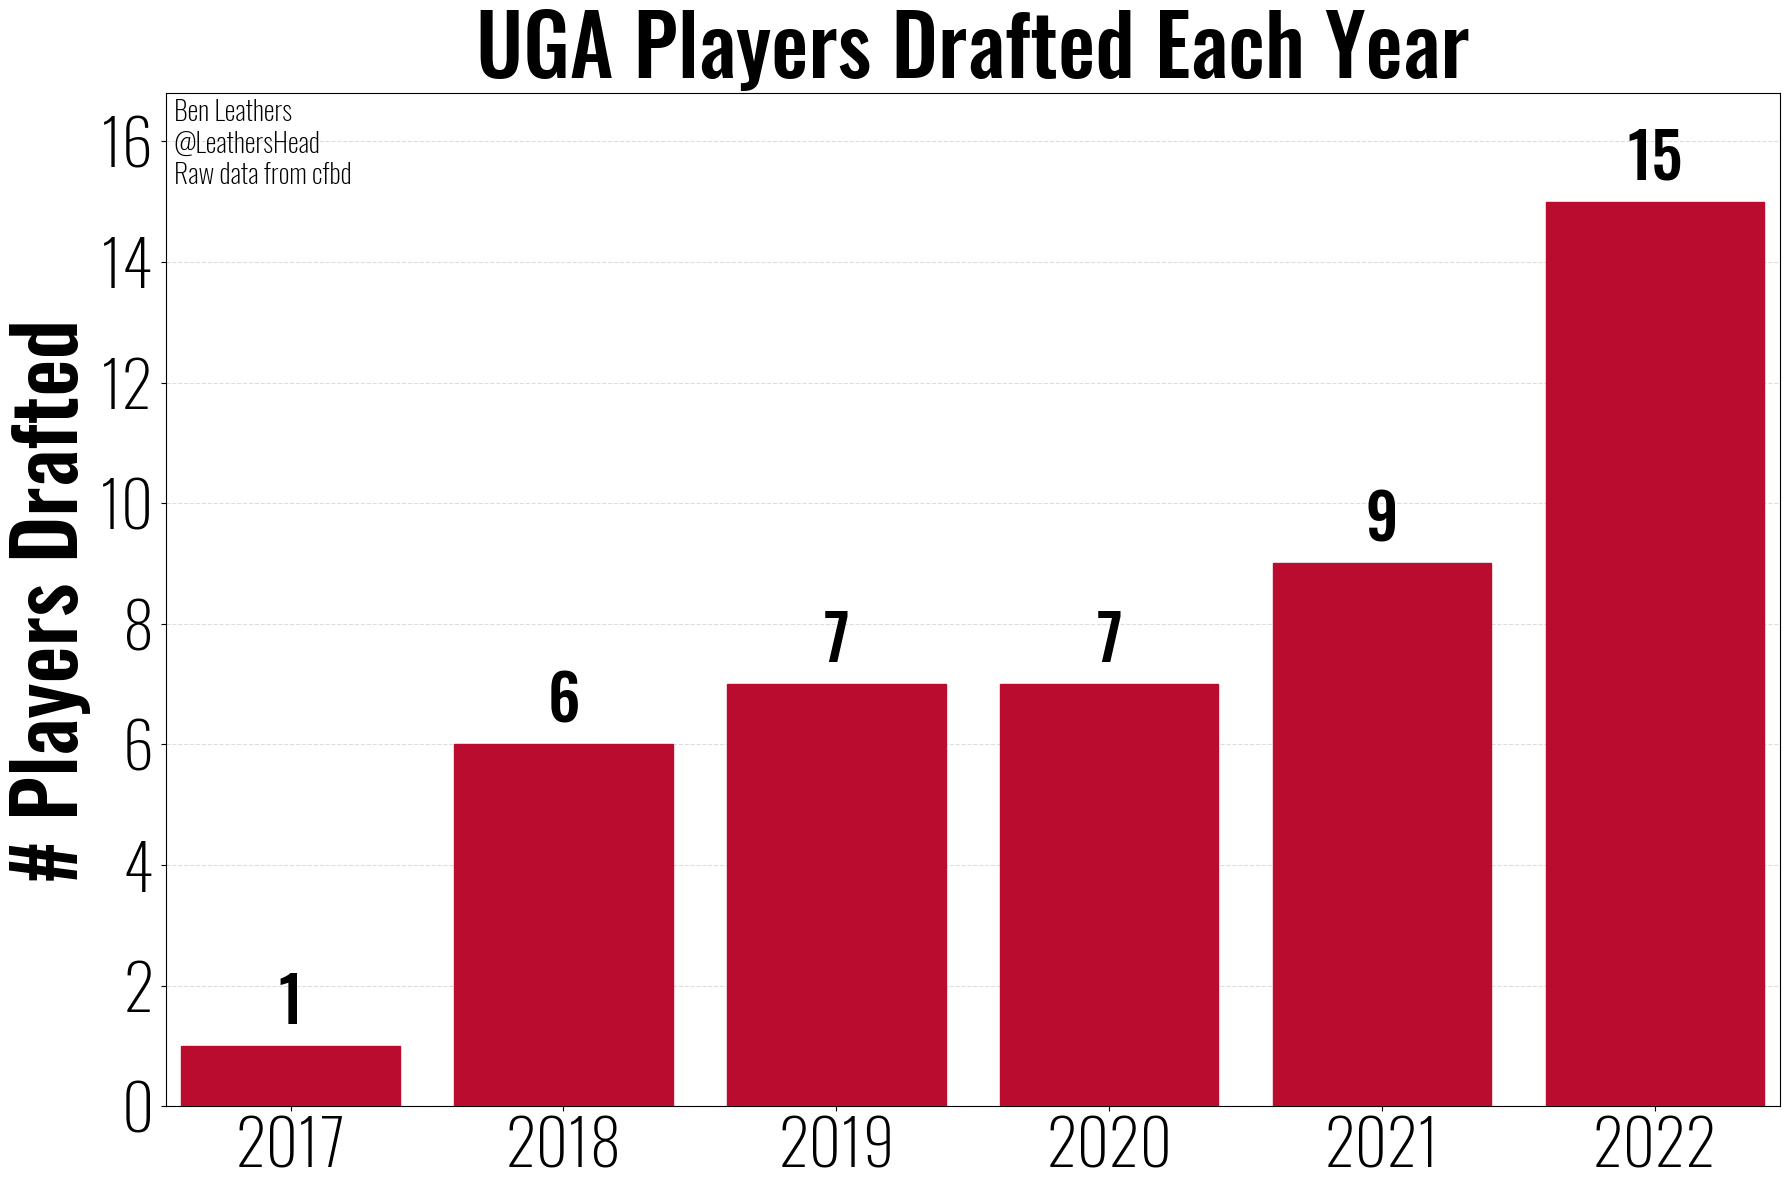

In [18]:
kirby_bar_df = all_coaches_careers_all_years[all_coaches_careers_all_years.coach_name == 'Kirby Smart'][['year', 'num_drafted']]
kirby_bar_df['year'] = kirby_bar_df['year'] + 1
# Create a plot
px = 1/plt.rcParams['figure.dpi']
pixel_width, pixel_height = (1800, 1200)

title_font = "Oswald" #"NCAA Georgia Bulldog Bold"
axis_font = subtitle_font = "Oswald"
fontweight="bold"

fig, ax = plt.subplots(figsize=(pixel_width*px, pixel_height*px))

# Add grid
ax.grid(color='#dddddd', linestyle='--', zorder=0, axis="y")
bars = ax.bar(kirby_bar_df['year'], kirby_bar_df['num_drafted'], zorder=10)

fig.canvas.draw()
r = fig.canvas.get_renderer()

# Color and Label Bars
for ix, bar in enumerate(ax.patches):
    bar.set_color(uga_colors_dict['red'])
    plt.text(bar.get_x() + .5 * bar.get_width(), bar.get_height() + .7,
                 f"{int(bar.get_height())}",
                 ha='center', va='center'
             ,fontdict={'fontname': axis_font, 
                        'fontsize': pixel_width/40, 
                        'fontweight':"medium"}
            )
        
    
# ax.set_xlabel("Total Draft Picks", fontdict={'fontname': axis_font, 'fontsize': pixel_width/40, 'fontweight':'medium'})
ax.set_ylabel('# Players Drafted', fontdict={'fontname': axis_font, 'fontsize': pixel_height/20, 'fontweight':'medium'})

ax.set_title('UGA Players Drafted Each Year', fontdict={'fontname': title_font, 
                                                                                    'fontsize': pixel_width/30, 
                                                                                    'fontweight':"medium"})
plt.draw()
# Set Y-axis font
for item in ax.get_yticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    text = item.get_text()
    if text == "Kirby Smart":
        item.set_fontweight("medium")
    else:
        item.set_fontweight("light")

# labels = [item.get_text() + f": #{kirby_bar_df.loc[ix, 'coaching_year_rank']}" for ix, item in enumerate(ax.get_yticklabels())]
# ax.set_yticklabels(labels)

# Set X-axis font
for item in ax.get_xticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    item.set_fontweight("light")
ax.tick_params(axis='y', which='major', pad=5)
# plt.xlim([25, 50])
# Adjust padding
plt.text(.005, .995, "Ben Leathers\n@LeathersHead\nRaw data from cfbd", transform=ax.transAxes ,
             ha='left', va='top'
         ,fontdict={'fontname': axis_font, 
                    'fontsize': pixel_width/90, 
                    'fontweight':"light",
                    'color':"black"
                   })
plt.margins(x=.01, y=.12)
plt.tight_layout()
# plt.savefig('num_draft_picks_through_first_6_years_as_head_coach.png', 
# fig.savefig('top_num_draft_picks_through_first_6_years_as_head_coach.svg', format='svg', dpi=1200)
fig.savefig('kirby_first_six.png', facecolor='white', transparent=False)

![](kirby_first_six.png)

<div style="font-family:Merriweather Sans; margin-bottom: 40px"></div>

<div style="font-family:Merriweather Sans; margin-bottom: 40px"> Wow... could that <i>"up and to the right"</i> trajectory suggest that Kirby's good at player development?</div>

<div style="font-family:Merriweather Sans; margin-bottom: 40px">You might be thinking to yourself... "No, it just suggests he's recruiting better players" which is a reasonable thing to think. Mark Richt is no question a DGD, and he elevated the program during his tenure. That being said, Kirby inherited a roster whose previous 3 recruiting classes had an average ranking of ~9th in the country, whereas Kirby has averaged rankings of ~3rd as head coach of UGA. So you would be justified to argue that this upward trajectory just points to better recruiting. But is there more to the story?</div>

In [19]:
# Keeper
q = """ WITH draft AS (
    SELECT
        nfl_athlete_id,
        CAST(college_athlete_id AS INT) AS athlete_id,
        college_team,
        college_conference,
        nfl_team,
        year,
        overall,
        round,
        pick,
        name,
        position
    FROM get_draft_picks
    WHERE year >= 2013
)

, recruiting_base AS (
    SELECT
        id AS recruiting_id,
        CAST(athlete_id AS INT) AS athlete_id,
        name AS recruiting_name,
        year AS recruiting_year, 
        committed_to,
        stars,
        rating
    FROM recruiting_players
    WHERE year >= 2008
)

--###################################################################################################
--# JOIN draft on recruiting athelete_id
--# athlete_id is now unique in recruiting_players
--###################################################################################################
, athlete_id_draft_all AS (
    SELECT
        nfl_athlete_id,
        recruiting_id,
        ROW_NUMBER() OVER (PARTITION BY athlete_id ORDER BY stars DESC) AS row_num
    FROM draft AS a
    JOIN recruiting_base AS b USING (athlete_id)
    WHERE b.recruiting_year BETWEEN a.year-5 AND a.year-3
)

, name_draft_all AS (
    SELECT
        nfl_athlete_id,
        c.recruiting_id,
        ROW_NUMBER() OVER (PARTITION BY a.name ORDER BY c.stars DESC) AS row_num
    FROM draft AS a
    LEFT JOIN recruiting_base AS b USING (athlete_id)
    JOIN recruiting_base AS c ON a.name = c.recruiting_name
    WHERE b.athlete_id IS NULL
    AND c.recruiting_year BETWEEN a.year-5 AND a.year-3
)


, fuzzy_match_draft_all AS (
    SELECT
        nfl_athlete_id,
        d.recruiting_name AS recruiting_id,
        ROW_NUMBER() OVER (PARTITION BY nfl_athlete_id) AS row_num
    FROM draft AS a
    LEFT JOIN recruiting_base AS b USING (athlete_id)
    LEFT JOIN recruiting_base AS c ON a.name = c.recruiting_name
    LEFT JOIN recruiting_base AS d ON a.name LIKE '%' || d.recruiting_name || '%' OR d.recruiting_name LIKE '%' || a.name || '%'
    WHERE b.athlete_id IS NULL
    AND c.recruiting_name IS NULL
    AND d.recruiting_year BETWEEN a.year-5 AND a.year-3
)


, neither_name_nor_athete_id_draft_all AS (
    SELECT
        nfl_athlete_id,
        NULL recruiting_id,
        ROW_NUMBER() OVER (PARTITION BY nfl_athlete_id) AS row_num
    FROM draft AS a
    LEFT JOIN recruiting_base AS b USING (athlete_id)
    LEFT JOIN recruiting_base AS c ON a.name = c.recruiting_name
    LEFT JOIN recruiting_base AS d ON a.name LIKE '%' || d.recruiting_name || '%' OR d.recruiting_name LIKE '%' || a.name || '%'
    WHERE b.athlete_id IS NULL
    AND c.recruiting_name IS NULL
    AND d.recruiting_name IS NULL
)

, all_ids AS (
    SELECT
        nfl_athlete_id,
        recruiting_id
    FROM  athlete_id_draft_all
    WHERE row_num = 1

    UNION ALL
    
    SELECT
        nfl_athlete_id,
        recruiting_id
    FROM  name_draft_all
    WHERE row_num = 1

    UNION ALL
    
    SELECT
        nfl_athlete_id,
        recruiting_id
    FROM  neither_name_nor_athete_id_draft_all
    WHERE row_num = 1

    UNION ALL
    
    SELECT
        nfl_athlete_id,
        recruiting_id
    FROM  fuzzy_match_draft_all
    WHERE row_num = 1
)

SELECT
    nfl_athlete_id,
    recruiting_id,
    college_team,
    college_conference,
    nfl_team,
    year,
    overall,
    round,
    pick,
    name,
    position,
    recruiting_name,
    recruiting_year, 
    committed_to,
    stars,
    rating
FROM all_ids
JOIN draft USING (nfl_athlete_id)
LEFT JOIN recruiting_base USING (recruiting_id)
ORDER BY overall ASC
"""
"""
"""

draft_recruiting = pd.read_sql_query(q, conn)
draft_recruiting

,nfl_athlete_id,recruiting_id,college_team,college_conference,nfl_team,year,overall,round,pick,name,position,recruiting_name,recruiting_year,committed_to,stars,rating
0,104204.0,32160,LSU,SEC,Cincinnati,2020,1.0,1.0,1.0,Joe Burrow,Quarterback,Joe Burrow,2015.0,Ohio State,4.0,0.9003
1,49986.0,25174,California,Pac-12,Los Angeles,2016,1.0,1.0,1.0,Jared Goff,Quarterback,Jared Goff,2013.0,California,4.0,0.9154
2,51534.0,28210,Texas A&M,SEC,Cleveland,2017,1.0,1.0,1.0,Myles Garrett,Defensive End,Myles Garrett,2014.0,Texas A&M,5.0,0.9992
3,104734.0,42908,Clemson,ACC,Jacksonville,2021,1.0,1.0,1.0,Trevor Lawrence,Quarterback,Trevor Lawrence,2018.0,Clemson,5.0,0.9999
4,29334.0,16770,Central Michigan,Mid-American,Kansas City,2013,1.0,1.0,1.0,Eric Fisher,Offensive Tackle,Eric Fisher,2009.0,Central Michigan,2.0,0.7667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,105318.0,46211,BYU,FBS Independents,Washington,2021,258.0,7.0,31.0,Dax Milne,Wide Receiver,Dax Milne,2018.0,BYU,2.0,0.7597
2473,105194.0,41409,Houston,American Athletic,Tampa Bay,2021,259.0,7.0,32.0,Grant Stuard,Outside Linebacker,Grant Stuard,2017.0,Houston,2.0,0.7783
2474,106271.0,None,Marshall,Conference USA,Kansas City,2022,259.0,7.0,38.0,Nazeeh Johnson,Safety,None,NaN,None,NaN,NaN
2475,106272.0,None,Purdue,Big Ten,Los Angeles,2022,260.0,7.0,39.0,Zander Horvath,Fullback,None,NaN,None,NaN,NaN


In [20]:
draft_recruiting[(draft_recruiting.college_team == "Georgia") & (draft_recruiting.year >= 2017)].fillna(2).groupby(['year','stars']).count()[['name']].reset_index().sort_values(by=['stars','year']).name.sum()

45

In [21]:
uga_draft_by_star = pd.pivot_table(draft_recruiting[(draft_recruiting.college_team == "Georgia") & (draft_recruiting.year >= 2017)].fillna(3),
               index='year',
               columns = 'stars',
               values = 'name',
               aggfunc = 'count').fillna(0)
uga_draft_by_star

stars,3.0,4.0,5.0
year,,,
2017,0.0,1.0,0.0
2018,1.0,2.0,3.0
2019,1.0,3.0,3.0
2020,2.0,3.0,2.0
2021,2.0,5.0,2.0
2022,3.0,6.0,6.0


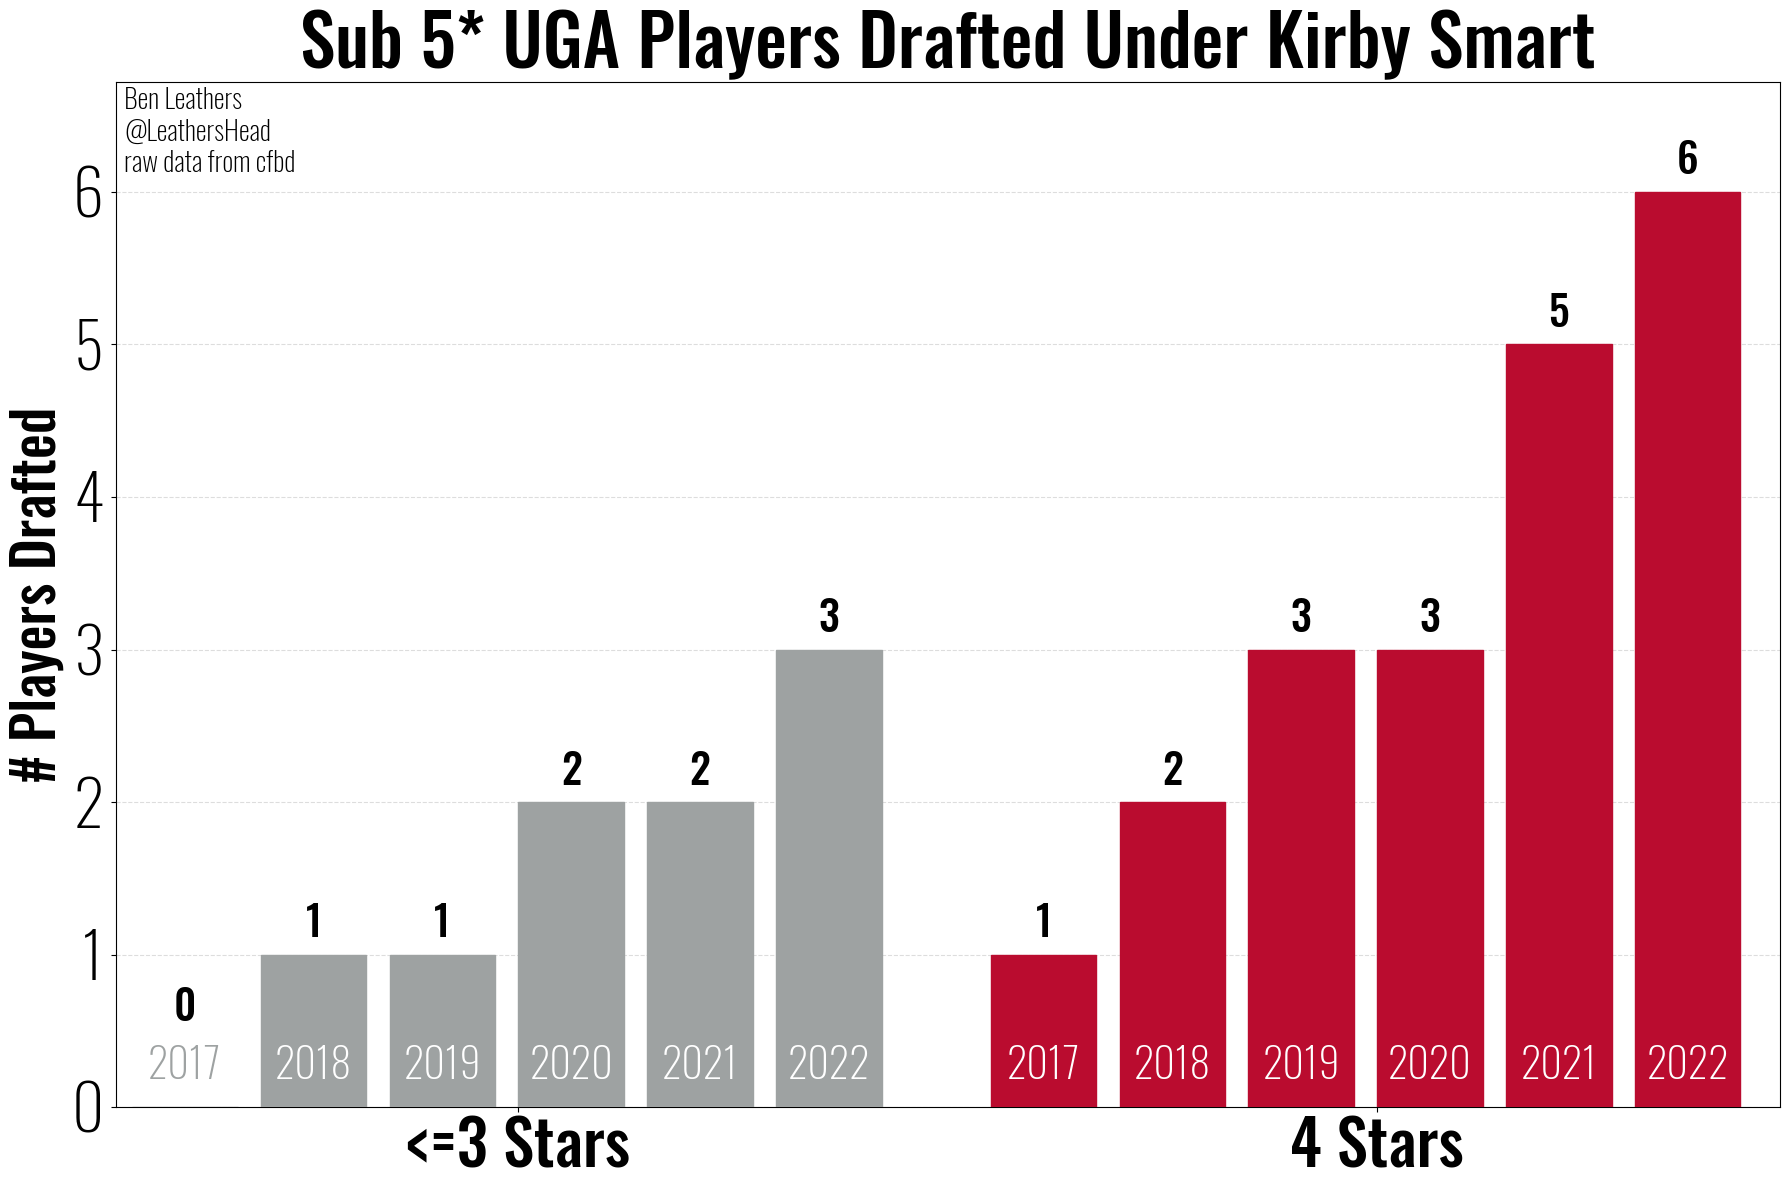

In [22]:
uga_draft_by_star_3_4 = uga_draft_by_star[[3, 4]]

# Create a plot
px = 1/plt.rcParams['figure.dpi']
pixel_width, pixel_height = (1800, 1200)

title_font = "Oswald" #"NCAA Georgia Bulldog Bold"
axis_font = subtitle_font = "Oswald"
fontweight="bold"

fig, ax = plt.subplots(figsize=(pixel_width*px, pixel_height*px))

x = np.arange(2)  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

for year in uga_draft_by_star.index:    
    offset = width * multiplier
    rects = ax.bar(x + offset, uga_draft_by_star_3_4.loc[year, [3, 4]].values.tolist(), width, label=year, zorder=10)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
        
ax.set_xticks(x + 2.5 * width, ['<=3 Stars', '4 Stars'])
# # Add grid
ax.grid(color='#dddddd', linestyle='--', zorder=0, axis="y")
# bars = ax.bar(kirby_bar_df['year'], kirby_bar_df['num_drafted'], zorder=10)

fig.canvas.draw()
r = fig.canvas.get_renderer()

# Color and Label Bars
for ix, bar in enumerate(ax.patches):
    bar_width = bar.get_width()
    bar.set_width(bar_width * .82)
    if ix % 2 == 0:
        bar.set_color(uga_colors_dict['grey'])
    else:
        bar.set_color(uga_colors_dict['red'])
        
    plt.text(bar.get_x() + .5 * bar.get_width(), bar.get_height() + .20 if ix > 0 else .65,
                 f"{int(bar.get_height())}",
                 ha='center', va='center'
             ,fontdict={'fontname': axis_font, 
                        'fontsize': pixel_width/60, 
                        'fontweight':"medium"}
            )
        
    plt.text(bar.get_x() + .5 * bar.get_width(), .27,
                 f"{uga_draft_by_star.index.values[ix//2]}",
                 ha='center', va='center'
             ,fontdict={'fontname': axis_font, 
                        'fontsize': pixel_width/60, 
                        'fontweight':"light",
                       'color':"white" if ix > 0 else uga_colors_dict['grey']},
             zorder=11
            )
        
    
# # ax.set_xlabel("Total Draft Picks", fontdict={'fontname': axis_font, 'fontsize': pixel_width/40, 'fontweight':'medium'})
ax.set_ylabel('# Players Drafted', fontdict={'fontname': axis_font, 'fontsize': pixel_height/30, 'fontweight':'medium'})

ax.set_title('Sub 5* UGA Players Drafted Under Kirby Smart', fontdict={'fontname': title_font, 
                                                                                    'fontsize': pixel_width/35, 
                                                                                    'fontweight':"medium"})
# plt.draw()
# # Set Y-axis font
for item in ax.get_yticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    text = item.get_text()
    if text == "Kirby Smart":
        item.set_fontweight("medium")
    else:
        item.set_fontweight("light")

# labels = [item.get_text() + f": #{kirby_bar_df.loc[ix, 'coaching_year_rank']}" for ix, item in enumerate(ax.get_yticklabels())]
# ax.set_yticklabels(labels)

# # Set X-axis font
for item in ax.get_xticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    item.set_fontweight("medium")
ax.tick_params(axis='y', which='major', pad=5)
# # plt.xlim([25, 50])
# # Adjust padding
plt.text(.005, .995, "Ben Leathers\n@LeathersHead\nraw data from cfbd", transform=ax.transAxes ,
             ha='left', va='top'
         ,fontdict={'fontname': axis_font, 
                    'fontsize': pixel_width/90, 
                    'fontweight':"light",
                    'color':"black"
                   })
plt.margins(x=.01, y=.12)
plt.tight_layout()
# # plt.savefig('num_draft_picks_through_first_6_years_as_head_coach.png', 
# # fig.savefig('top_num_draft_picks_through_first_6_years_as_head_coach.svg', format='svg', dpi=1200)
# plt.ylim([-1, 7])
fig.savefig('uga_draft_by_star.png', facecolor='white', transparent=False)

![](uga_draft_by_star.png)

<div style="font-family:Merriweather Sans; margin-bottom: 40px"></div>

<div style="font-family:Merriweather Sans; margin-bottom: 40px">  It's not just better players. Even the 3 stars are more likely to get drafted the longer they play under Kirby.</div>

<h3 style="font-family:Merriweather Sans; margin-bottom: 40px"> How do UGA's Draft results during Kirby's first 6 years compare to other coach's first 6 years?</h3>

In [23]:
q = """WITH coaches AS (

    SELECT
        first_name || " " || last_name AS coach_name, 
        school AS college_team,
        year,
        ROW_NUMBER() OVER (PARTITION BY first_name, last_name ORDER BY year ASC) AS coaching_year
    FROM get_coaches
    )
, coaches_careers AS (WITH RECURSIVE
    coaches_recurse AS (
        SELECT
            coach_name,
            college_team,
            year,
            coaching_year, 
            college_team || ': ' || year AS career
        FROM coaches
        WHERE coaching_year = 1
        UNION ALL
        SELECT
            a.coach_name,
            a.college_team,
            a.year,
            a.coaching_year,
            
            CASE 
                WHEN a.college_team = b.college_team AND a.year = b.year + 1
                THEN 
                    CASE 
                        WHEN b.career LIKE '%,%' 
                        THEN CASE 
                                WHEN substr(b.career, LENGTH(b.career) - INSTR(strrev(b.career), ',') + 1) LIKE '%-%' 
                                THEN SUBSTR(b.career, 1, LENGTH(b.career) - 4) || CAST(a.year AS TEXT)
                                ELSE b.career || '-' || CAST(a.year AS TEXT)
                            END
                        ELSE CASE
                                WHEN b.career LIKE '%-%' 
                                THEN SUBSTR(b.career, 1, LENGTH(b.career) - 4) || CAST(a.year AS TEXT)
                                ELSE b.career || '-' || CAST(a.year AS TEXT)
                            END
                    END
                ELSE b.career || ', ' || a.college_team || ': ' || CAST(a.year AS TEXT)
            END AS career
        FROM coaches AS a
        JOIN coaches_recurse AS b
        ON a.coach_name = b.coach_name
        AND a.coaching_year = b.coaching_year + 1
        )
        SELECT * FROM coaches_recurse
    )
    
, draft_picks AS (
    SELECT
        year - 1 AS year,
        college_team,
        COUNT(1) AS num_drafted
    FROM get_draft_picks
    WHERE college_team IS NOT NULL
    AND year IS NOT NULL
    GROUP BY 1, 2
    )
    
, coach_draft_years AS (
    SELECT
        coach_name,
        college_team,
        year,
        coaching_year,
        career,
        COALESCE(num_drafted, 0) AS num_drafted
    FROM coaches_careers
    LEFT JOIN draft_picks USING (year, college_team)
)

, cumulative_drafts AS (
    SELECT
        coach_name,
        college_team,
        year,
        coaching_year,
        career,
        num_drafted, 
        SUM(num_drafted) OVER (PARTITION BY coach_name ORDER BY coaching_year ASC) AS career_drafted
    FROM coach_draft_years
)

SELECT
        RANK() OVER (PARTITION BY coaching_year ORDER BY career_drafted DESC) AS coaching_year_rank,
        coach_name,
        college_team,
        year,
        career AS career_span,
        num_drafted, 
        career_drafted,
        coaching_year
FROM cumulative_drafts
WHERE coaching_year = 6
AND year != 2022
ORDER BY career_drafted DESC

"""
coaches_careers = pd.read_sql_query(q, conn)
coaches_careers.head(1)

,coaching_year_rank,coach_name,college_team,year,career_span,num_drafted,career_drafted,coaching_year
0,1,Jim Tressel,Ohio State,2006,Ohio State: 2001-2006,8,47,6


/var/folders/gp/8yj3g9ss45g4_z3nhnd9117w0000gq/T/ipykernel_29339/586321489.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


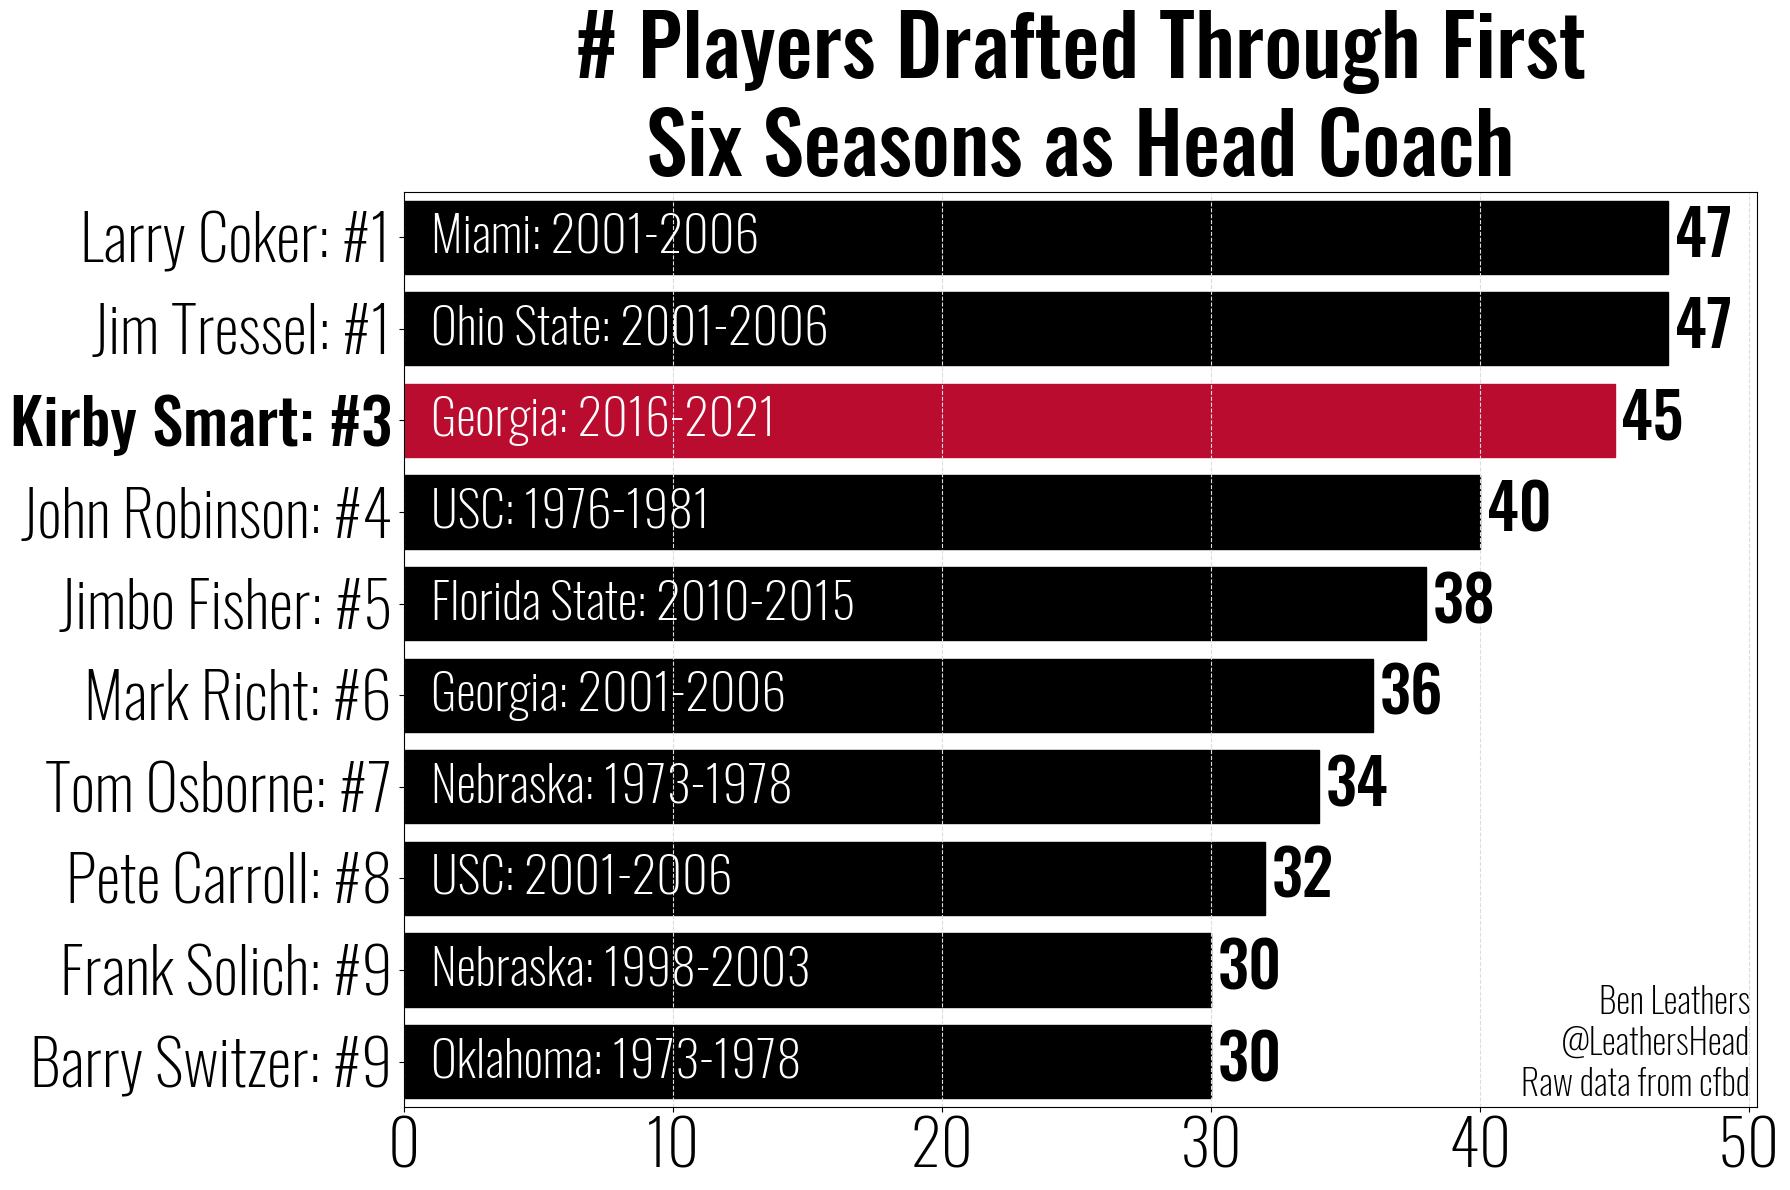

In [24]:
bar_df = coaches_careers.head(10).sort_values(by = 'career_drafted', ascending=True).reset_index()

# Create a plot
px = 1/plt.rcParams['figure.dpi']
pixel_width, pixel_height = (1800, 1200)

title_font = "Oswald" #"NCAA Georgia Bulldog Bold"
axis_font = subtitle_font = "Oswald"
fontweight="bold"

fig, ax = plt.subplots(figsize=(pixel_width*px, pixel_height*px))

# Add grid
ax.grid(color='#dddddd', linestyle='--', zorder=1, axis="x")
ax.barh(bar_df['coach_name'], bar_df['career_drafted'], zorder=0)

# Color bars
# Add bar values
# Annotate bars
for ix, bar in enumerate(ax.patches):
    bar.set_color('black')
    if bar_df.loc[ix, 'coach_name'] == 'Kirby Smart':
        bar.set_color('#BA0C2F')
    plt.text(bar.get_width() + .25, bar.get_y()+0.5*bar.get_height(),
                 f"{int(bar.get_width())}",
                 ha='left', va='center'
             ,fontdict={'fontname': axis_font, 
                        'fontsize': pixel_width/40, 
                        'fontweight':"medium"}
            )
    
    plt.text(1, bar.get_y()+0.5*bar.get_height(),
                 f"{bar_df.loc[ix, 'career_span']}",
                 ha='left', va='center'
             ,fontdict={'fontname': axis_font, 
                        'fontsize': pixel_width/50, 
                        'fontweight':"light",
                        'color':"white"
                       }
            )
# {bar_df.loc[ix, 'coaching_year_rank']}
    
# ax.set_xlabel("Total Draft Picks", fontdict={'fontname': axis_font, 'fontsize': pixel_width/40, 'fontweight':'medium'})
ax.set_ylabel('', fontdict={'fontname': axis_font, 'fontsize': pixel_height/20, 'fontweight':'medium'})

ax.set_title('# Players Drafted Through First\nSix Seasons as Head Coach', fontdict={'fontname': title_font, 
                                                                                    'fontsize': pixel_width/30, 
                                                                                    'fontweight':"medium"})
plt.draw()
# Set Y-axis font
for item in ax.get_yticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    text = item.get_text()
    if text == "Kirby Smart":
        item.set_fontweight("medium")
    else:
        item.set_fontweight("light")

labels = [item.get_text() + f": #{bar_df.loc[ix, 'coaching_year_rank']}" for ix, item in enumerate(ax.get_yticklabels())]
ax.set_yticklabels(labels)

# Set X-axis font
for item in ax.get_xticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    item.set_fontweight("light")
ax.tick_params(axis='y', which='major', pad=5)
# plt.xlim([25, 50])
# Adjust padding
plt.text(.995, .005, "Ben Leathers\n@LeathersHead\nRaw data from cfbd", transform=ax.transAxes ,
             ha='right', va='bottom'
         ,fontdict={'fontname': axis_font, 
                    'fontsize': pixel_width/70, 
                    'fontweight':"light",
                    'color':"black"
                   })
plt.margins(x=.07, y=.01)
plt.tight_layout()
# plt.savefig('num_draft_picks_through_first_6_years_as_head_coach.png', 
# fig.savefig('top_num_draft_picks_through_first_6_years_as_head_coach.svg', format='svg', dpi=1200)
fig.savefig('top_num_draft_picks_through_first_6_years_as_head_coach.png', facecolor='white', transparent=False)

![](top_num_draft_picks_through_first_6_years_as_head_coach.png)

<div style="font-family:Merriweather Sans; margin-bottom: 40px"></div>

In [25]:
bar_df.columns

Index(['index', 'coaching_year_rank', 'coach_name', 'college_team', 'year',
       'career_span', 'num_drafted', 'career_drafted', 'coaching_year'],
      dtype='object')

<div style="font-family:Merriweather Sans; margin-bottom: 40px"> Seeing Jimbo Fisher at #5 was surprising to begin with, but then I remembered he's got a reputation for recruiting and he's developing a reputation for losing recruits now that the transfer portal is a factor. Mark Richt at #6 is less surprising, he was a great coach who did put a lot of talent into the NFL.</div>


<h3 style="font-family:Merriweather Sans; margin-bottom: 40px">So how did Larry Coker and Jim Tressel out perform Kirby in the first 6 years?</h3>

In [26]:
q = """WITH coaches AS (

    SELECT
        first_name || " " || last_name AS coach_name, 
        school AS college_team,
        year,
        ROW_NUMBER() OVER (PARTITION BY first_name, last_name ORDER BY year ASC) AS coaching_year
    FROM get_coaches
    )
, coaches_careers AS (WITH RECURSIVE
    coaches_recurse AS (
        SELECT
            coach_name,
            college_team,
            year,
            coaching_year, 
            college_team || ': ' || year AS career
        FROM coaches
        WHERE coaching_year = 1
        UNION ALL
        SELECT
            a.coach_name,
            a.college_team,
            a.year,
            a.coaching_year,
            
            CASE 
                WHEN a.college_team = b.college_team AND a.year = b.year + 1
                THEN 
                    CASE 
                        WHEN b.career LIKE '%,%' 
                        THEN CASE 
                                WHEN substr(b.career, LENGTH(b.career) - INSTR(strrev(b.career), ',') + 1) LIKE '%-%' 
                                THEN SUBSTR(b.career, 1, LENGTH(b.career) - 4) || CAST(a.year AS TEXT)
                                ELSE b.career || '-' || CAST(a.year AS TEXT)
                            END
                        ELSE CASE
                                WHEN b.career LIKE '%-%' 
                                THEN SUBSTR(b.career, 1, LENGTH(b.career) - 4) || CAST(a.year AS TEXT)
                                ELSE b.career || '-' || CAST(a.year AS TEXT)
                            END
                    END
                ELSE b.career || ', ' || a.college_team || ': ' || CAST(a.year AS TEXT)
            END AS career
        FROM coaches AS a
        JOIN coaches_recurse AS b
        ON a.coach_name = b.coach_name
        AND a.coaching_year = b.coaching_year + 1
        )
        SELECT * FROM coaches_recurse
    )
    
, draft_picks AS (
    SELECT
        year - 1 AS year,
        college_team,
        COUNT(1) AS num_drafted
    FROM get_draft_picks
    WHERE college_team IS NOT NULL
    AND year IS NOT NULL
    GROUP BY 1, 2
    )
    
, coach_draft_years AS (
    SELECT
        coach_name,
        college_team,
        year,
        coaching_year,
        career,
        COALESCE(num_drafted, 0) AS num_drafted
    FROM coaches_careers
    LEFT JOIN draft_picks USING (year, college_team)
)

, cumulative_drafts AS (
    SELECT
        coach_name,
        college_team,
        year,
        coaching_year,
        career,
        num_drafted, 
        SUM(num_drafted) OVER (PARTITION BY coach_name ORDER BY coaching_year ASC) AS career_drafted
    FROM coach_draft_years
)

SELECT
        RANK() OVER (PARTITION BY coaching_year ORDER BY career_drafted DESC) AS coaching_year_rank,
        coach_name,
        college_team,
        year,
        career AS career_span,
        num_drafted, 
        career_drafted,
        coaching_year
FROM cumulative_drafts
WHERE year != 2022
ORDER BY career_drafted DESC

"""
"""
SELECT
    coach_name,
    AVG(num_drafted) AS average,
    COUNT(1) AS num_years
FROM cumulative_drafts

GROUP BY 1
ORDER BY 2 DESC
"""

top_3_coaches_careers = pd.read_sql_query(q, conn)
top_3_coaches_careers.head(1)

,coaching_year_rank,coach_name,college_team,year,career_span,num_drafted,career_drafted,coaching_year
0,1,Joe Paterno,Penn State,2011,Penn State: 1966-2011,4,184,46


In [27]:
top_3_coaches_names = bar_df[bar_df.coaching_year_rank <= 3].coach_name.tolist()
line_df_flat = top_3_coaches_careers[top_3_coaches_careers.coach_name.isin(top_3_coaches_names)].sort_values(by = 'career_drafted', ascending=True).reset_index()
# line_df.sort_values(by=['coach_name','year'])

In [28]:
# line_df_flat.sort_values(by=['coach_name','year'])

In [29]:
line_df = pd.pivot_table(line_df_flat[line_df_flat.coaching_year <= 6], index = 'coaching_year', columns = 'coach_name', values= 'career_drafted')

In [30]:
coaches_line_dict = add_lines_to_dict(coaches_line_dict, top_3_coaches_names)

In [31]:
def get_line_attr(df, colname, attr_dict, attr='color', default=None):
    if attr == 'linewidth':
        return attr_dict[colname][attr] if attr in attr_dict[colname].keys() else default
    else:
        return [attr_dict[colname][attr] if attr in attr_dict[colname].keys() else default for x in range(df.shape[0])]

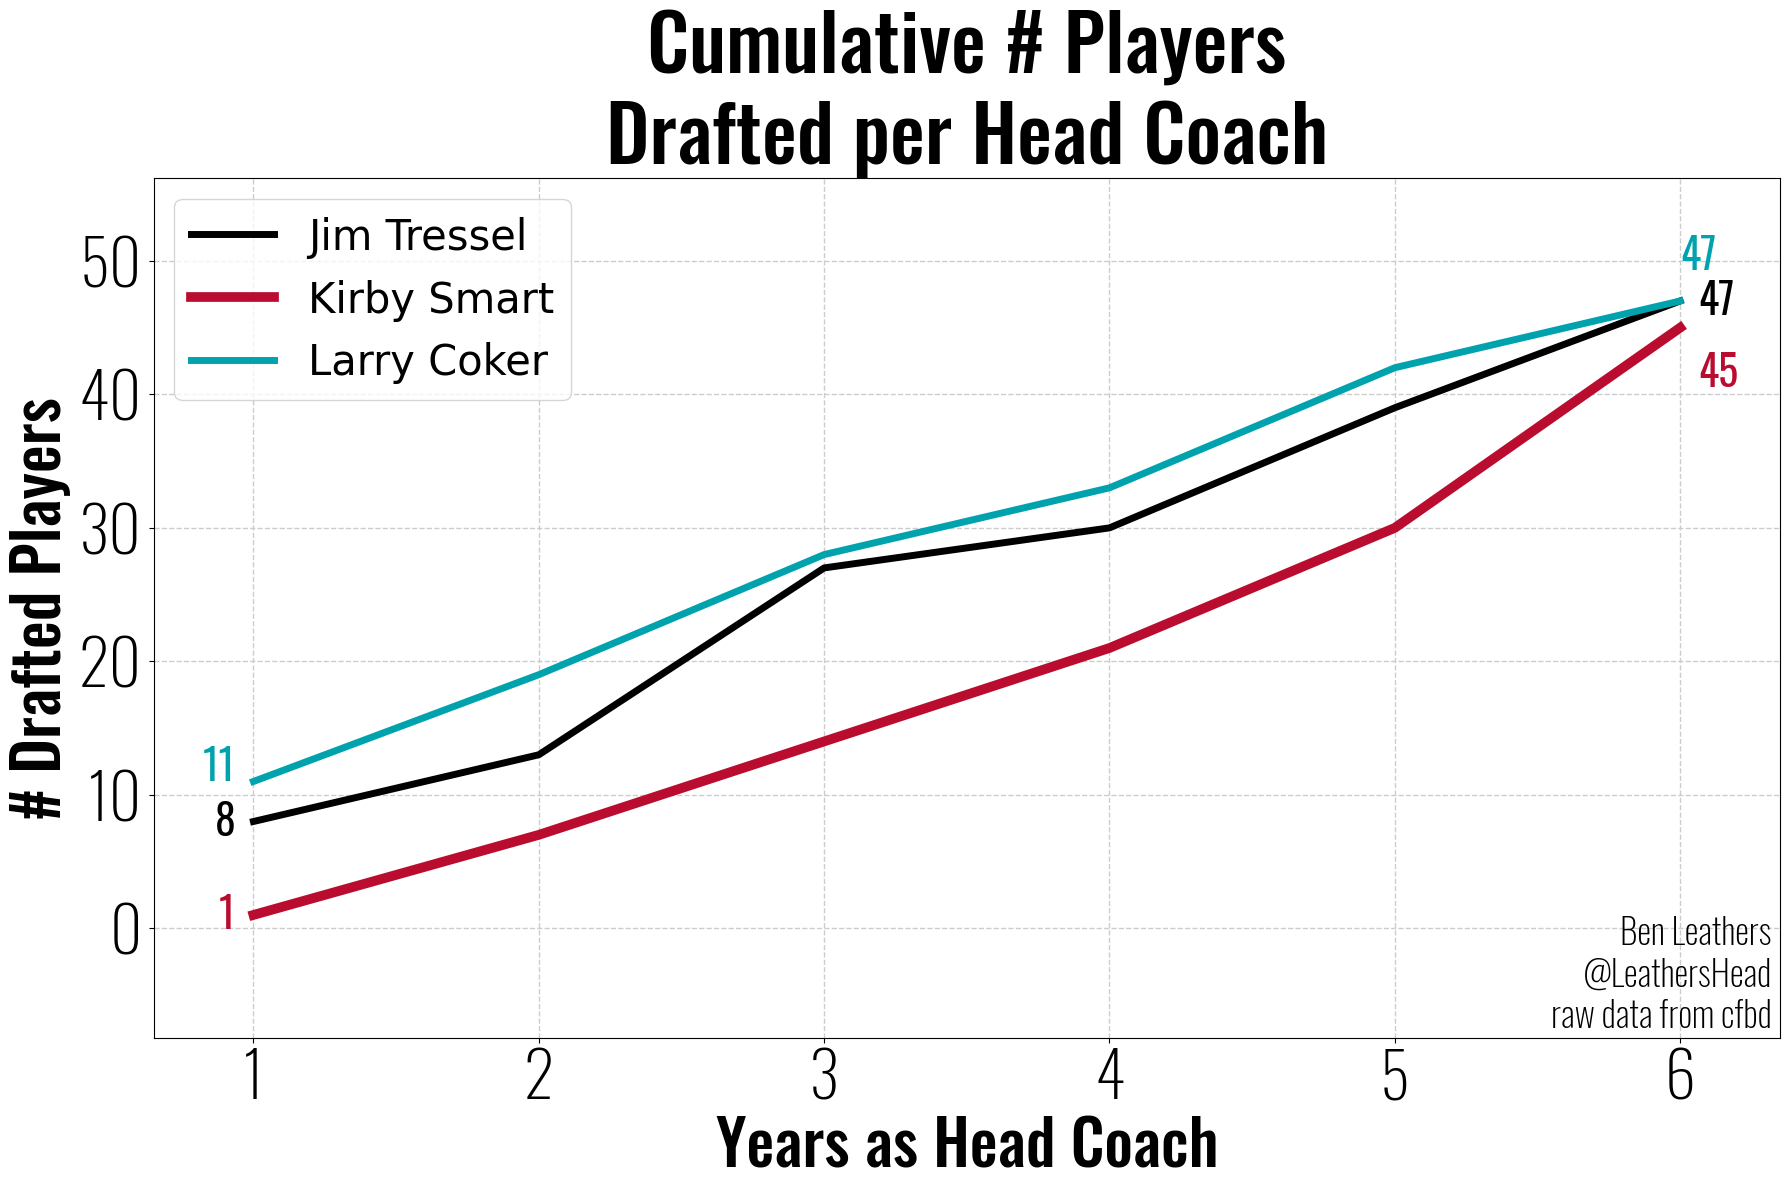

In [32]:
# Create a plot
px = 1/plt.rcParams['figure.dpi']
pixel_width, pixel_height = (1800, 1200)

title_font = "Oswald" #"NCAA Georgia Bulldog Bold"
axis_font = subtitle_font = "Oswald"
fontweight="bold"

fig, ax = plt.subplots(figsize=(pixel_width*px, pixel_height*px))

# Add grid
ax.grid(color='#cccccc', linestyle='--', zorder=0, linewidth=1) #, axis="x")
lines = []
for i, coach_name in enumerate(line_df.columns):
    line, = ax.plot(line_df[coach_name], 
            color=coaches_line_dict[coach_name]['color'], 
            linestyle=coaches_line_dict[coach_name]['linestyle'],
            linewidth=get_line_attr(line_df, coach_name, coaches_line_dict, attr='linewidth', default=5),
            label=coach_name,
            zorder=10)
    lines.append(line)
    
ax.set_xlabel("Years as Head Coach", fontdict={'fontname': axis_font, 'fontsize': pixel_width/40, 'fontweight':'medium'})
ax.set_ylabel('# Drafted Players', fontdict={'fontname': axis_font, 'fontsize': pixel_width/40, 'fontweight':'medium'})

ax.set_title('Cumulative # Players\nDrafted per Head Coach', fontdict={'fontname': title_font, 
                                                                                    'fontsize': pixel_width/32, 
                                                                                    'fontweight':"medium"})
plt.draw()
# # Set Y-axis font
for item in ax.get_yticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    text = item.get_text()
    if text == "Kirby Smart":
        item.set_fontweight("medium")
    else:
        item.set_fontweight("light")

# Set X-axis font
for item in ax.get_xticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    item.set_fontweight("light")
ax.tick_params(axis='y', which='major', pad=5)
ax.legend(loc='upper left', 
          fontsize=pixel_width/60, 
          handles=lines, 
          #labels=[x + ': ' + line_df_flat.loc[(line_df_flat.coaching_year == 6) & (line_df_flat.coach_name == x), 'career_span'].values[0] for x in line_df.columns.tolist()]
         ) 
#, ncol=2, bbox_to_anchor=(.5, 1.1))
# plt.xlim([25, 50])
# # Adjust padding
plt.text(.995, .005, "Ben Leathers\n@LeathersHead\nraw data from cfbd", transform=ax.transAxes ,
             ha='right', va='bottom'
         ,fontdict={'fontname': axis_font, 
                    'fontsize': pixel_width/70, 
                    'fontweight':"light",
                    'color':"black"
                   })

for coach_name in line_df.columns:
    val_1 = line_df.loc[1, coach_name]
    val_6 = line_df.loc[6, coach_name]
    annotation_font_size = pixel_width/60
    annotation_x_offset = pixel_width/100
    ax.annotate(
        val_1,
        xy=(1, val_1), xycoords='data',
        xytext=(-1 * annotation_x_offset, 15 if coach_name == 'Larry Coker' else 0), textcoords='offset pixels',
        fontsize= annotation_font_size,
        fontfamily=axis_font,
        color=coaches_line_dict[coach_name]['color'],
        ha = 'right',
        va = 'center'
    )
    if coach_name == 'Larry Coker':
        ax.annotate(
            val_6,
            xy=(6, val_6), xycoords='data',
            xytext=(0, pixel_width/40), textcoords='offset pixels',
            fontsize= annotation_font_size,
            fontfamily=axis_font,
            color=coaches_line_dict[coach_name]['color'],
            ha = 'left',
            va = 'center',
            # arrowprops=dict(arrowstyle="->")
        )
    elif coach_name == 'Kirby Smart':
        ax.annotate(
            val_6,
            xy=(6, val_6), xycoords='data',
            xytext=(annotation_x_offset, -pixel_width/40), textcoords='offset pixels',
            fontsize= annotation_font_size,
            fontfamily=axis_font,
            color=coaches_line_dict[coach_name]['color'],
            ha = 'left',
            va = 'center'
        )
    else:
        ax.annotate(
            val_6,
            xy=(6, val_6), xycoords='data',
            xytext=(annotation_x_offset, 0), textcoords='offset pixels',
            fontsize= annotation_font_size,
            fontfamily=axis_font,
            color=coaches_line_dict[coach_name]['color'],
            ha = 'left',
            va = 'center',
            # arrowprops=dict(arrowstyle="->")
        )

plt.margins(x=.07, y=.2)
plt.tight_layout()
# # plt.savefig('num_draft_picks_through_first_6_years_as_head_coach.png', 
# # fig.savefig('top_num_draft_picks_through_first_6_years_as_head_coach.svg', format='svg', dpi=1200)
fig.savefig('top_3_num_draft_picks_through_first_6_years_as_head_coach_line.png', facecolor='white', transparent=False)

![](top_3_num_draft_picks_through_first_6_years_as_head_coach_line.png)

<div style="font-family:Merriweather Sans; margin-bottom: 40px"></div>

<div style="font-family:Merriweather Sans; margin-bottom: 40px">Oh, they stepped into programs with loaded rosters that put 8 and 11 players into the NFL in year 1. Kirby didn't inherit a completely bare roster, but it was certainly more modest.</div>

<h3 style="font-family:Merriweather Sans; margin-bottom: 40px">How many UGA players will need to be drafted in order for Kirby to jump into first in year 7?</h3>

In [33]:
q = """WITH coaches AS (

    SELECT
        first_name || " " || last_name AS coach_name, 
        school AS college_team,
        year,
        ROW_NUMBER() OVER (PARTITION BY first_name, last_name ORDER BY year ASC) AS coaching_year
    FROM get_coaches
    )
, coaches_careers AS (WITH RECURSIVE
    coaches_recurse AS (
        SELECT
            coach_name,
            college_team,
            year,
            coaching_year, 
            college_team || ': ' || year AS career
        FROM coaches
        WHERE coaching_year = 1
        UNION ALL
        SELECT
            a.coach_name,
            a.college_team,
            a.year,
            a.coaching_year,
            
            CASE 
                WHEN a.college_team = b.college_team AND a.year = b.year + 1
                THEN 
                    CASE 
                        WHEN b.career LIKE '%,%' 
                        THEN CASE 
                                WHEN substr(b.career, LENGTH(b.career) - INSTR(strrev(b.career), ',') + 1) LIKE '%-%' 
                                THEN SUBSTR(b.career, 1, LENGTH(b.career) - 4) || CAST(a.year AS TEXT)
                                ELSE b.career || '-' || CAST(a.year AS TEXT)
                            END
                        ELSE CASE
                                WHEN b.career LIKE '%-%' 
                                THEN SUBSTR(b.career, 1, LENGTH(b.career) - 4) || CAST(a.year AS TEXT)
                                ELSE b.career || '-' || CAST(a.year AS TEXT)
                            END
                    END
                ELSE b.career || ', ' || a.college_team || ': ' || CAST(a.year AS TEXT)
            END AS career
        FROM coaches AS a
        JOIN coaches_recurse AS b
        ON a.coach_name = b.coach_name
        AND a.coaching_year = b.coaching_year + 1
        )
        SELECT * FROM coaches_recurse
    )
    
, draft_picks AS (
    SELECT
        year - 1 AS year,
        college_team,
        COUNT(1) AS num_drafted
    FROM get_draft_picks
    WHERE college_team IS NOT NULL
    AND year IS NOT NULL
    GROUP BY 1, 2
    )
    
, coach_draft_years AS (
    SELECT
        coach_name,
        college_team,
        year,
        coaching_year,
        career,
        COALESCE(num_drafted, 0) AS num_drafted
    FROM coaches_careers
    LEFT JOIN draft_picks USING (year, college_team)
)

, cumulative_drafts AS (
    SELECT
        coach_name,
        college_team,
        year,
        coaching_year,
        career,
        num_drafted, 
        SUM(num_drafted) OVER (PARTITION BY coach_name ORDER BY coaching_year ASC) AS career_drafted
    FROM coach_draft_years
)
, only_k_and_7 AS (
    SELECT
            coach_name,
            college_team,
            year,
            career AS career_span,
            num_drafted, 
            career_drafted,
            coaching_year
    FROM cumulative_drafts
WHERE (coaching_year = 7) OR (coaching_year = 6 AND coach_name = "Kirby Smart") 
AND year != 2022
)
    SELECT
        RANK() OVER (ORDER BY career_drafted DESC) AS coaching_year_rank,
        coach_name,
        college_team,
        year,
        career_span,
        num_drafted, 
        career_drafted,
        coaching_year
    FROM only_k_and_7
    ORDER BY career_drafted DESC

"""
coaches_careers_7 = pd.read_sql_query(q, conn)
coaches_careers_7.head(1)

,coaching_year_rank,coach_name,college_team,year,career_span,num_drafted,career_drafted,coaching_year
0,1,Jim Tressel,Ohio State,2007,Ohio State: 2001-2007,3,50,7


/var/folders/gp/8yj3g9ss45g4_z3nhnd9117w0000gq/T/ipykernel_29339/4045286358.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


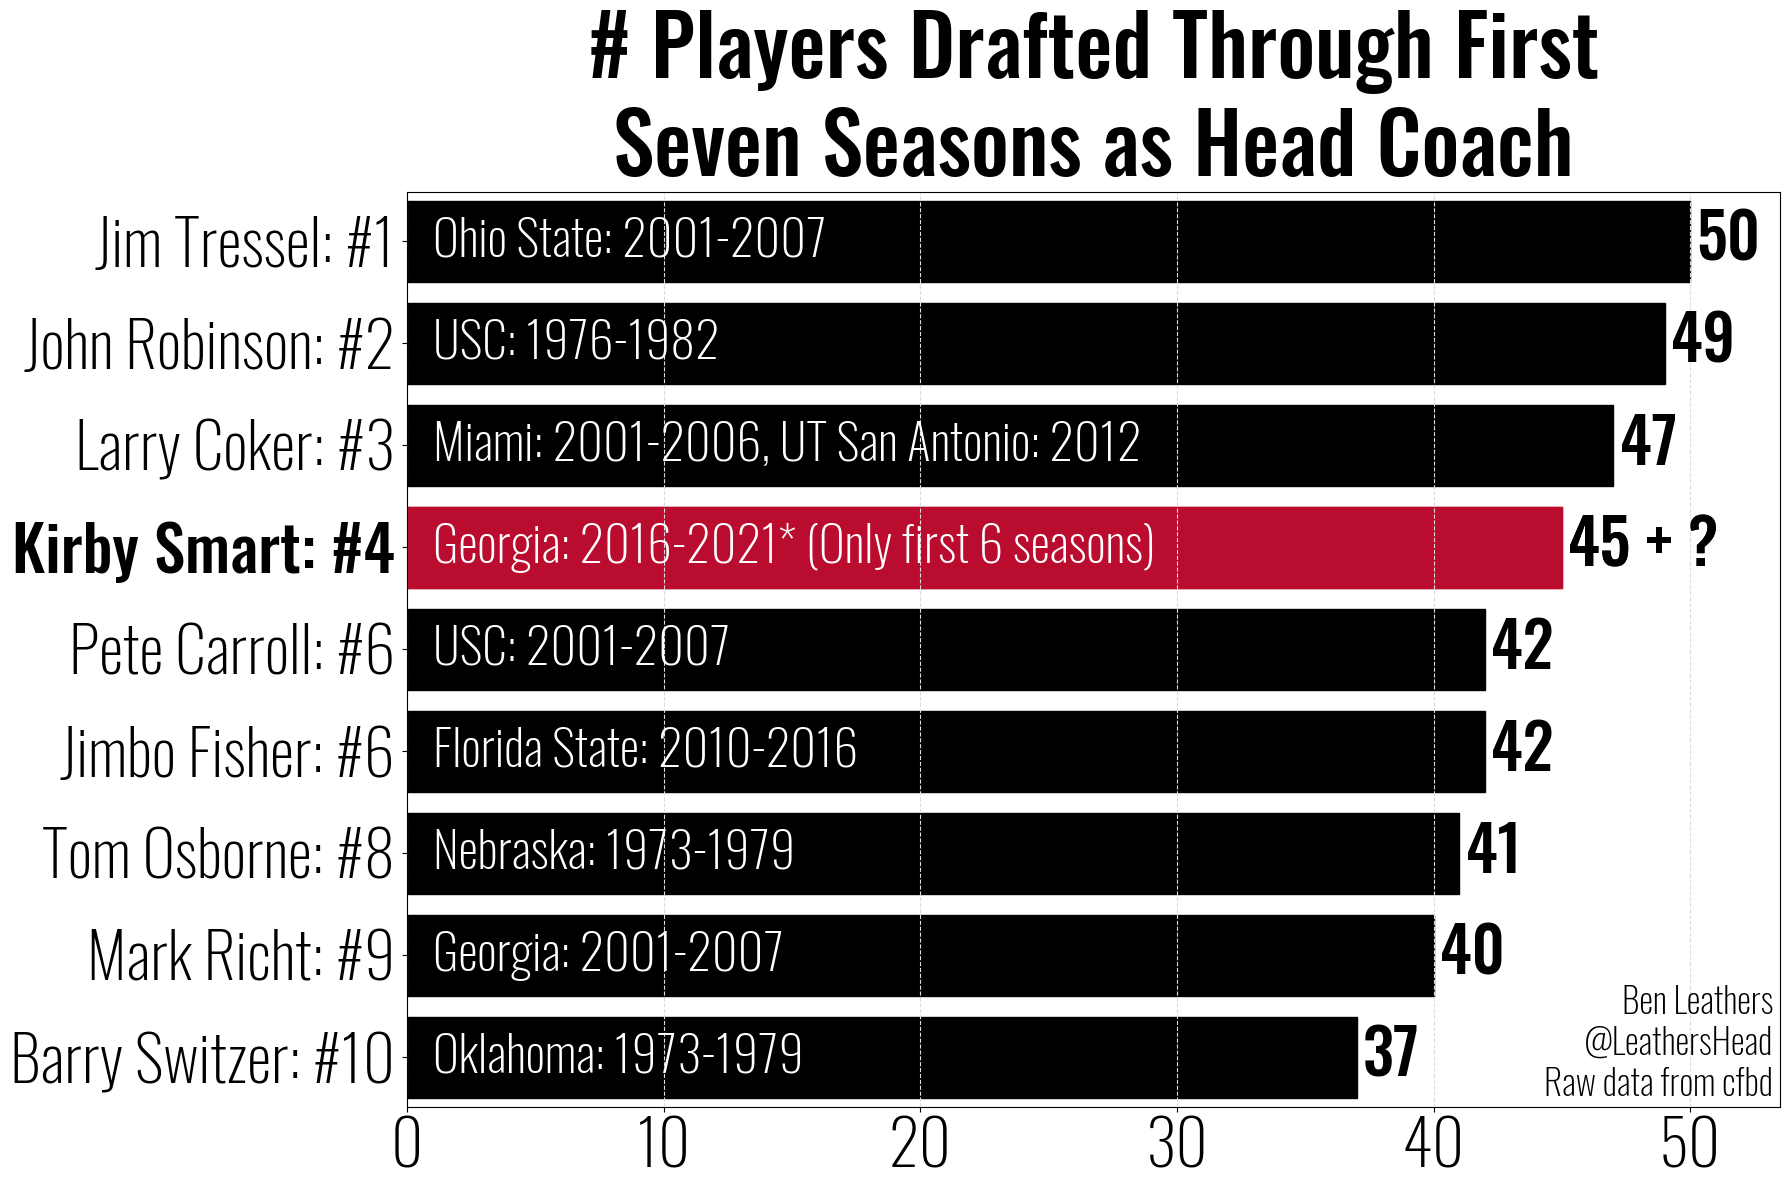

In [34]:
bar_df = coaches_careers_7.head(10).sort_values(by = 'career_drafted', ascending=True).reset_index()

# Create a plot
px = 1/plt.rcParams['figure.dpi']
pixel_width, pixel_height = (1800, 1200)

title_font = "Oswald" #"NCAA Georgia Bulldog Bold"
axis_font = subtitle_font = "Oswald"
fontweight="bold"

fig, ax = plt.subplots(figsize=(pixel_width*px, pixel_height*px))

# Add grid
ax.grid(color='#dddddd', linestyle='--', zorder=1, axis="x")
ax.barh(bar_df['coach_name'], bar_df['career_drafted'], zorder=0)

# Color bars
# Add bar values
# Annotate bars
for ix, bar in enumerate(ax.patches):
    bar.set_color('black')
    if bar_df.loc[ix, 'coach_name'] == 'Kirby Smart':
        bar.set_color('#BA0C2F')
        bar_val = f"{int(bar.get_width())} + ?"
    else:
        bar_val = f"{int(bar.get_width())}"
    plt.text(bar.get_width() + .25, bar.get_y()+0.5*bar.get_height(),
                 bar_val,
                 ha='left', va='center'
             ,fontdict={'fontname': axis_font, 
                        'fontsize': pixel_width/40, 
                        'fontweight':"medium"}
            )
    
    if bar_df.loc[ix, 'coach_name'] == 'Kirby Smart' and '22' in bar_df.loc[ix, 'career_span']:
        continue
    elif bar_df.loc[ix, 'coach_name'] == 'Kirby Smart':
        career_text = f"{bar_df.loc[ix, 'career_span']}* (Only first 6 seasons)"        
    else:
        career_text = f"{bar_df.loc[ix, 'career_span']}"
    plt.text(1, bar.get_y()+0.5*bar.get_height(),
                 career_text,
                 ha='left', va='center'
             ,fontdict={'fontname': axis_font, 
                        'fontsize': pixel_width/50, 
                        'fontweight':"light",
                        'color':"white"
                       }
            )
# {bar_df.loc[ix, 'coaching_year_rank']}
    
# ax.set_xlabel("Total Draft Picks", fontdict={'fontname': axis_font, 'fontsize': pixel_width/40, 'fontweight':'medium'})
ax.set_ylabel('', fontdict={'fontname': axis_font, 'fontsize': pixel_height/20, 'fontweight':'medium'})

ax.set_title('# Players Drafted Through First\nSeven Seasons as Head Coach', fontdict={'fontname': title_font, 
                                                                                    'fontsize': pixel_width/30, 
                                                                                    'fontweight':"medium"})
plt.draw()
# Set Y-axis font
for item in ax.get_yticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    text = item.get_text()
    if text == "Kirby Smart":
        item.set_fontweight("medium")
    else:
        item.set_fontweight("light")

labels = [item.get_text() + f": #{bar_df.loc[bar_df.coach_name == item.get_text(), 'coaching_year_rank'].values[0]}" for ix, item in enumerate(ax.get_yticklabels())]
ax.set_yticklabels(labels)

# Set X-axis font
for item in ax.get_xticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    item.set_fontweight("light")
ax.tick_params(axis='y', which='major', pad=5)
# plt.xlim([25, 50])
# Adjust padding
plt.text(.995, .005, "Ben Leathers\n@LeathersHead\nRaw data from cfbd", transform=ax.transAxes ,
             ha='right', va='bottom'
         ,fontdict={'fontname': axis_font, 
                    'fontsize': pixel_width/70, 
                    'fontweight':"light",
                    'color':"black"
                   })
plt.margins(x=.07, y=.01)
plt.tight_layout()
# plt.savefig('num_draft_picks_through_first_6_years_as_head_coach.png', 
# fig.savefig('top_num_draft_picks_through_first_6_years_as_head_coach.svg', format='svg', dpi=1200)
fig.savefig('top_num_draft_picks_through_first_7_years_as_head_coach.png', facecolor='white', transparent=False)

![](top_num_draft_picks_through_first_7_years_as_head_coach.png)

<div style="font-family:Merriweather Sans; margin-bottom: 40px"></div>

<h3 style="font-family:Merriweather Sans; margin-bottom: 40px"> What Happened to Larry Coker?</h3>

<div style="font-family:Merriweather Sans; margin-bottom: 40px">He got fired from Miami after going 6-6 and didn't coach again until 2012 when he was hired by UTSA.</div>

<h3 style="font-family:Merriweather Sans; margin-bottom: 40px">Let's check on some coaches that are noticibly absent from the top ten.</h3>

/var/folders/gp/8yj3g9ss45g4_z3nhnd9117w0000gq/T/ipykernel_29339/4231410562.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


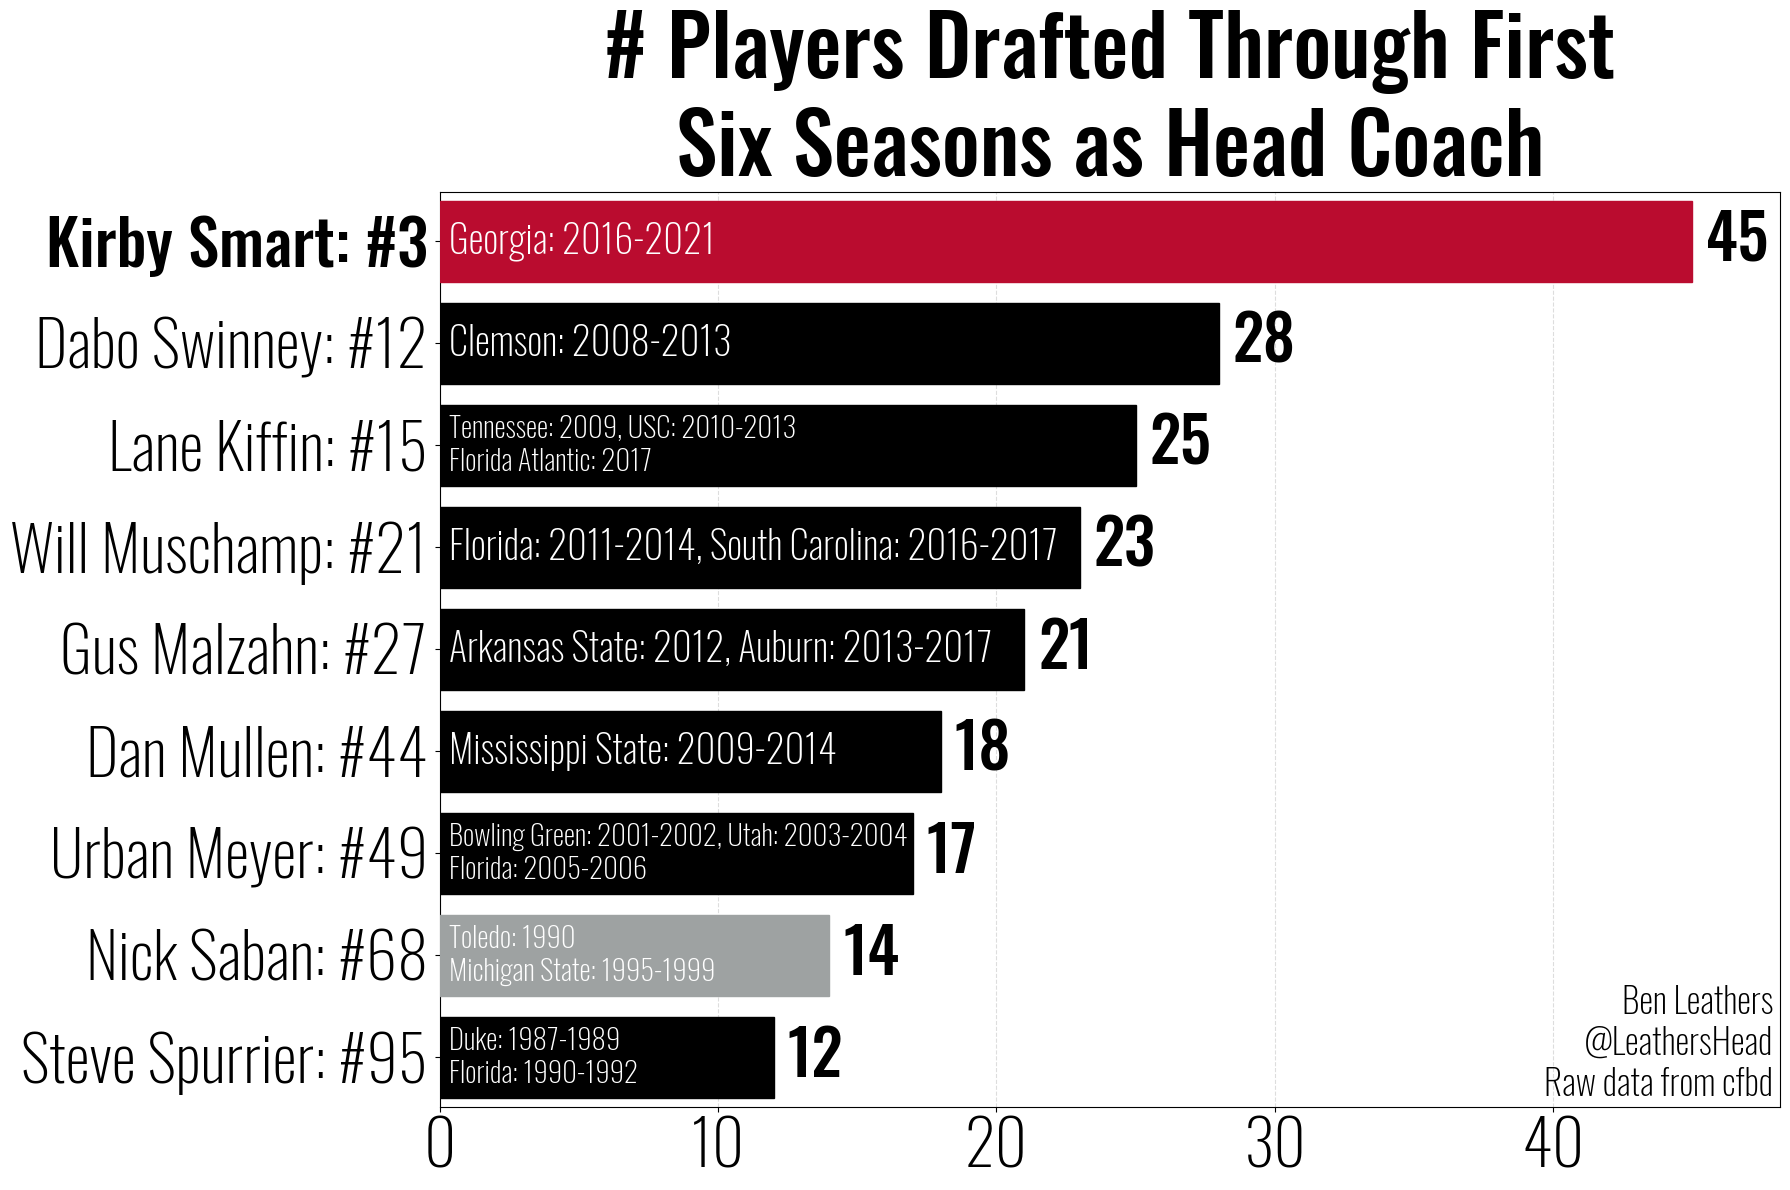

In [35]:
coaches_to_find = ['Kirby Smart', 'Nick Saban', 'Steve Spurrier', 'Dan Mullen', 'Urban Meyer', 'Dabo Swinney', 'Gus Malzahn', 'Lane Kiffin', 'Will Muschamp']
bar_df = coaches_careers[coaches_careers.coach_name.isin(coaches_to_find)].sort_values(by = 'career_drafted', ascending=True).reset_index()

def rreplace(s, old, new, occurrence):
    li = s.rsplit(old, occurrence)
    return new.join(li)

# Create a plot
px = 1/plt.rcParams['figure.dpi']
pixel_width, pixel_height = (1800, 1200)

title_font = "Oswald" #"NCAA Georgia Bulldog Bold"
axis_font = subtitle_font = "Oswald"
fontweight="bold"

fig, ax = plt.subplots(figsize=(pixel_width*px, pixel_height*px))

# Add grid
ax.grid(color='#dddddd', linestyle='--', zorder=0, axis="x")
bars = ax.barh(bar_df['coach_name'], bar_df['career_drafted'], zorder=10)

fig.canvas.draw()
r = fig.canvas.get_renderer()

# Color and Label Bars
for ix, bar in enumerate(ax.patches):
    bar.set_color('black')
    if bar_df.loc[ix, 'coach_name'] == 'Kirby Smart':
        bar.set_color('#BA0C2F')
    if bar_df.loc[ix, 'coach_name'] == 'Nick Saban':
        bar.set_color(uga_colors_dict['grey'])
    plt.text(bar.get_width() + .5, bar.get_y()+0.5*bar.get_height(),
                 f"{int(bar.get_width())}",
                 ha='left', va='center'
             ,fontdict={'fontname': axis_font, 
                        'fontsize': pixel_width/40, 
                        'fontweight':"medium"}
            )
    
    annotation_margin = .35
    annotation = plt.text(annotation_margin, bar.get_y()+0.5*bar.get_height(),
                 f"{bar_df.loc[ix, 'career_span']}",
                 ha='left', va='center'
             ,fontdict={'fontname': axis_font, 
                        'fontsize': pixel_width/65, 
                        'fontweight':"light",
                        'color':"white"
                       }
                          , zorder=11
            )
    tbb = annotation.get_window_extent(renderer=r)
    text_width = tbb.width
    text_height = tbb.height
    bbb = bar.get_window_extent(renderer=r)
    bar_width = bbb.width
    bar_height = bbb.height
    if text_width > bar_width - 10:
        last_text = annotation.get_text()
        if ',' not in last_text:
            break
        next_text = rreplace(last_text, ', ', '\n', 1)
        annotation.set_text(next_text)
        old_fontsize = annotation.get_fontsize()
        annotation.set_fontsize(old_fontsize * .75)

# # Color bars
        
# {bar_df.loc[ix, 'coaching_year_rank']}
    
# ax.set_xlabel("Total Draft Picks", fontdict={'fontname': axis_font, 'fontsize': pixel_width/40, 'fontweight':'medium'})
ax.set_ylabel('', fontdict={'fontname': axis_font, 'fontsize': pixel_height/20, 'fontweight':'medium'})

ax.set_title('# Players Drafted Through First\nSix Seasons as Head Coach', fontdict={'fontname': title_font, 
                                                                                    'fontsize': pixel_width/30, 
                                                                                    'fontweight':"medium"})
plt.draw()
# Set Y-axis font
for item in ax.get_yticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    text = item.get_text()
    if text == "Kirby Smart":
        item.set_fontweight("medium")
    else:
        item.set_fontweight("light")

labels = [item.get_text() + f": #{bar_df.loc[ix, 'coaching_year_rank']}" for ix, item in enumerate(ax.get_yticklabels())]
ax.set_yticklabels(labels)

# Set X-axis font
for item in ax.get_xticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    item.set_fontweight("light")
ax.tick_params(axis='y', which='major', pad=5)
# plt.xlim([25, 50])
# Adjust padding
plt.text(.995, .005, "Ben Leathers\n@LeathersHead\nRaw data from cfbd", transform=ax.transAxes ,
             ha='right', va='bottom'
         ,fontdict={'fontname': axis_font, 
                    'fontsize': pixel_width/70, 
                    'fontweight':"light",
                    'color':"black"
                   })
plt.margins(x=.07, y=.01)
plt.tight_layout()
# plt.savefig('num_draft_picks_through_first_6_years_as_head_coach.png', 
# fig.savefig('top_num_draft_picks_through_first_6_years_as_head_coach.svg', format='svg', dpi=1200)
fig.savefig('6_years_other_head_coaches.png', facecolor='white', transparent=False)

![](6_years_other_head_coaches.png)

<div style="font-family:Merriweather Sans; margin-bottom: 40px"></div>

In [36]:
coaches_careers.head()

,coaching_year_rank,coach_name,college_team,year,career_span,num_drafted,career_drafted,coaching_year
0,1,Jim Tressel,Ohio State,2006,Ohio State: 2001-2006,8,47,6
1,1,Larry Coker,Miami,2006,Miami: 2001-2006,5,47,6
2,3,Kirby Smart,Georgia,2021,Georgia: 2016-2021,15,45,6
3,4,John Robinson,USC,1981,USC: 1976-1981,3,40,6
4,5,Jimbo Fisher,Florida State,2015,Florida State: 2010-2015,2,38,6


In [37]:
q = """WITH coaches AS (

    SELECT
        first_name || " " || last_name AS coach_name, 
        school AS college_team,
        year,
        ROW_NUMBER() OVER (PARTITION BY first_name, last_name, school ORDER BY year ASC) AS coaching_year
    FROM get_coaches
    )
, coaches_careers AS (WITH RECURSIVE
    coaches_recurse AS (
        SELECT
            coach_name,
            college_team,
            year,
            coaching_year, 
            college_team || ': ' || year AS career
        FROM coaches
        WHERE coaching_year = 1
        UNION ALL
        SELECT
            a.coach_name,
            a.college_team,
            a.year,
            a.coaching_year,
            
            CASE 
                WHEN a.college_team = b.college_team AND a.year = b.year + 1
                THEN 
                    CASE 
                        WHEN b.career LIKE '%,%' 
                        THEN CASE 
                                WHEN substr(b.career, LENGTH(b.career) - INSTR(strrev(b.career), ',') + 1) LIKE '%-%' 
                                THEN SUBSTR(b.career, 1, LENGTH(b.career) - 4) || CAST(a.year AS TEXT)
                                ELSE b.career || '-' || CAST(a.year AS TEXT)
                            END
                        ELSE CASE
                                WHEN b.career LIKE '%-%' 
                                THEN SUBSTR(b.career, 1, LENGTH(b.career) - 4) || CAST(a.year AS TEXT)
                                ELSE b.career || '-' || CAST(a.year AS TEXT)
                            END
                    END
                ELSE b.career || ', ' || a.college_team || ': ' || CAST(a.year AS TEXT)
            END AS career
        FROM coaches AS a
        JOIN coaches_recurse AS b
        ON a.coach_name = b.coach_name
        AND a.college_team = b.college_team
        AND a.coaching_year = b.coaching_year + 1
        )
        SELECT * FROM coaches_recurse
    )
    
, draft_picks AS (
    SELECT
        year - 1 AS year,
        college_team,
        COUNT(1) AS num_drafted
    FROM get_draft_picks
    WHERE college_team IS NOT NULL
    AND year IS NOT NULL
    GROUP BY 1, 2
    )
    
, coach_draft_years AS (
    SELECT
        coach_name,
        college_team,
        year,
        coaching_year,
        career,
        COALESCE(num_drafted, 0) AS num_drafted
    FROM coaches_careers
    LEFT JOIN draft_picks USING (year, college_team)
)

, cumulative_drafts AS (
    SELECT
        coach_name,
        college_team,
        year,
        coaching_year,
        career,
        num_drafted, 
        SUM(num_drafted) OVER (PARTITION BY coach_name, college_team ORDER BY coaching_year ASC) AS school_tenure_drafts
    FROM coach_draft_years
)

SELECT
        RANK() OVER (PARTITION BY coaching_year ORDER BY school_tenure_drafts DESC) AS coaching_school_year_rank,
        coach_name,
        college_team,
        year,
        career AS career_span,
        num_drafted, 
        school_tenure_drafts,
        coaching_year,
        SUM(num_drafted) OVER (PARTITION BY coach_name ORDER BY year ASC) AS total_draft_picks,
        coach_name || ' - ' || MAX(career) OVER (PARTITION BY coach_name, college_team) AS school_span_title,
        ROW_NUMBER() OVER (PARTITION BY coach_name ORDER BY year ASC) AS career_coaching_year
FROM cumulative_drafts
WHERE year != 2022
ORDER BY school_tenure_drafts DESC

"""
coaches_school_careers = pd.read_sql_query(q, conn)
coaches_school_careers.tail(10)

,coaching_school_year_rank,coach_name,college_team,year,career_span,num_drafted,school_tenure_drafts,coaching_year,total_draft_picks,school_span_title,career_coaching_year
11815,3,Amos Alonzo Stagg,Chicago,1923,Chicago: 1892-1923,0,0,32,0,Amos Alonzo Stagg - Chicago: 1892-1932,33
11816,3,Amos Alonzo Stagg,Chicago,1924,Chicago: 1892-1924,0,0,33,0,Amos Alonzo Stagg - Chicago: 1892-1932,34
11817,3,Amos Alonzo Stagg,Chicago,1925,Chicago: 1892-1925,0,0,34,0,Amos Alonzo Stagg - Chicago: 1892-1932,35
11818,2,Amos Alonzo Stagg,Chicago,1926,Chicago: 1892-1926,0,0,35,0,Amos Alonzo Stagg - Chicago: 1892-1932,36
11819,2,Amos Alonzo Stagg,Chicago,1927,Chicago: 1892-1927,0,0,36,0,Amos Alonzo Stagg - Chicago: 1892-1932,37
11820,2,Amos Alonzo Stagg,Chicago,1928,Chicago: 1892-1928,0,0,37,0,Amos Alonzo Stagg - Chicago: 1892-1932,38
11821,2,Amos Alonzo Stagg,Chicago,1929,Chicago: 1892-1929,0,0,38,0,Amos Alonzo Stagg - Chicago: 1892-1932,39
11822,2,Amos Alonzo Stagg,Chicago,1930,Chicago: 1892-1930,0,0,39,0,Amos Alonzo Stagg - Chicago: 1892-1932,40
11823,2,Amos Alonzo Stagg,Chicago,1931,Chicago: 1892-1931,0,0,40,0,Amos Alonzo Stagg - Chicago: 1892-1932,41
11824,2,Amos Alonzo Stagg,Chicago,1932,Chicago: 1892-1932,0,0,41,0,Amos Alonzo Stagg - Chicago: 1892-1932,42


In [38]:
coaches_for_school_tenures = ['Kirby Smart', 'Nick Saban', 'Steve Spurrier', 'Urban Meyer']
kirby_v_line_df_flat = coaches_school_careers[coaches_school_careers.coach_name.isin(coaches_for_school_tenures)].sort_values(by = ['coach_name', 'year'], ascending=True).reset_index()
# line_df.sort_values(by=['coach_name','year'])

In [39]:
kirby_v_line_df_flat.sort_values(by=['coach_name','year'])

,index,coaching_school_year_rank,coach_name,college_team,year,career_span,num_drafted,school_tenure_drafts,coaching_year,total_draft_picks,school_span_title,career_coaching_year
0,4586,357,Kirby Smart,Georgia,2016,Georgia: 2016,1,1,1,1,Kirby Smart - Georgia: 2016-2021,1
1,1923,72,Kirby Smart,Georgia,2017,Georgia: 2016-2017,6,7,2,7,Kirby Smart - Georgia: 2016-2021,2
2,1072,26,Kirby Smart,Georgia,2018,Georgia: 2016-2018,7,14,3,14,Kirby Smart - Georgia: 2016-2021,3
3,689,14,Kirby Smart,Georgia,2019,Georgia: 2016-2019,7,21,4,21,Kirby Smart - Georgia: 2016-2021,4
4,458,10,Kirby Smart,Georgia,2020,Georgia: 2016-2020,9,30,5,30,Kirby Smart - Georgia: 2016-2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...
70,1075,26,Urban Meyer,Ohio State,2014,Ohio State: 2012-2014,5,14,3,49,Urban Meyer - Ohio State: 2012-2018,13
71,539,6,Urban Meyer,Ohio State,2015,Ohio State: 2012-2015,12,26,4,61,Urban Meyer - Ohio State: 2012-2018,14
72,388,6,Urban Meyer,Ohio State,2016,Ohio State: 2012-2016,7,33,5,68,Urban Meyer - Ohio State: 2012-2018,15
73,287,5,Urban Meyer,Ohio State,2017,Ohio State: 2012-2017,7,40,6,75,Urban Meyer - Ohio State: 2012-2018,16


In [40]:
kirby_v_total_tenure_per_school = kirby_v_line_df_flat.groupby(['coach_name', 'college_team']).max().reset_index()[['coach_name', 'college_team', 'career_span']]

In [41]:
kirby_v_total_tenure_per_school['coach_school'] = kirby_v_total_tenure_per_school['coach_name'] + ' - ' + kirby_v_total_tenure_per_school['career_span']

In [42]:
kirby_v_total_tenure_per_school

,coach_name,college_team,career_span,coach_school
0,Kirby Smart,Georgia,Georgia: 2016-2021,Kirby Smart - Georgia: 2016-2021
1,Nick Saban,Alabama,Alabama: 2007-2021,Nick Saban - Alabama: 2007-2021
2,Nick Saban,LSU,LSU: 2000-2004,Nick Saban - LSU: 2000-2004
3,Nick Saban,Michigan State,Michigan State: 1995-1999,Nick Saban - Michigan State: 1995-1999
4,Nick Saban,Toledo,Toledo: 1990,Nick Saban - Toledo: 1990
5,Steve Spurrier,Duke,Duke: 1987-1989,Steve Spurrier - Duke: 1987-1989
6,Steve Spurrier,Florida,Florida: 1990-2001,Steve Spurrier - Florida: 1990-2001
7,Steve Spurrier,South Carolina,South Carolina: 2005-2015,Steve Spurrier - South Carolina: 2005-2015
8,Urban Meyer,Bowling Green,Bowling Green: 2001-2002,Urban Meyer - Bowling Green: 2001-2002
9,Urban Meyer,Florida,Florida: 2005-2010,Urban Meyer - Florida: 2005-2010


In [43]:
#kirby_v_total_tenure_per_school[((kirby_v_total_tenure_per_school.college_team.isin(['LSU', 'Alabama', ,'Florida', 'Michigan State', 'South Carolina', 'Ohio State'])))]['coach_school']

In [44]:
coaches_line_dict = add_lines_to_dict(coaches_line_dict, 
                                      kirby_v_total_tenure_per_school[kirby_v_total_tenure_per_school.coach_name != 'Kirby Smart'].coach_school.tolist())

In [45]:
coaches_line_dict

{'Kirby Smart': {'color': '#BA0C2F', 'linestyle': 'solid', 'linewidth': 7},
 'Jim Tressel': {'color': '#000000', 'linestyle': 'solid'},
 'Larry Coker': {'color': '#00A3AD', 'linestyle': 'solid'},
 'Nick Saban - Alabama: 2007-2021': {'color': '#B4BD00', 'linestyle': 'solid'},
 'Nick Saban - LSU: 2000-2004': {'color': '#9EA2A2', 'linestyle': 'solid'},
 'Nick Saban - Michigan State: 1995-1999': {'color': '#BA0C2F',
  'linestyle': 'dotted'},
 'Nick Saban - Toledo: 1990': {'color': '#000000', 'linestyle': 'dotted'},
 'Steve Spurrier - Duke: 1987-1989': {'color': '#00A3AD',
  'linestyle': 'dotted'},
 'Steve Spurrier - Florida: 1990-2001': {'color': '#B4BD00',
  'linestyle': 'dotted'},
 'Steve Spurrier - South Carolina: 2005-2015': {'color': '#9EA2A2',
  'linestyle': 'dotted'},
 'Urban Meyer - Bowling Green: 2001-2002': {'color': '#BA0C2F',
  'linestyle': 'dashed'},
 'Urban Meyer - Florida: 2005-2010': {'color': '#000000',
  'linestyle': 'dashed'},
 'Urban Meyer - Ohio State: 2012-2018': {'co

In [46]:
def get_coach_school(row):
    return kirby_v_total_tenure_per_school.loc[(kirby_v_total_tenure_per_school.coach_name == row.coach_name) & 
                                        (kirby_v_total_tenure_per_school.college_team == row.college_team),
                                       'coach_school'].values[0]

In [47]:
kirby_v_line_df_flat['coach_school'] = kirby_v_line_df_flat.apply(get_coach_school, axis=1)

In [48]:
kirby_v_line_df_flat.columns

Index(['index', 'coaching_school_year_rank', 'coach_name', 'college_team',
       'year', 'career_span', 'num_drafted', 'school_tenure_drafts',
       'coaching_year', 'total_draft_picks', 'school_span_title',
       'career_coaching_year', 'coach_school'],
      dtype='object')

In [49]:
saba_starts_color_dict = {'Kirby Smart': {'color': '#BA0C2F', 'linestyle': 'solid', 'linewidth': 7},
                   'Kirby Smart - Georgia: 2016-2021':{'color': '#BA0C2F', 'linestyle': 'solid', 'linewidth': 7},
 'Nick Saban - Toledo: 1990': {'color': '#B4BD00', 'linestyle': 'dashdot'},
 'Nick Saban - Alabama: 2007-2021': {'color': '#9EA2A2', 'linestyle': 'dashed'},
 'Nick Saban - LSU: 2000-2004': {'color': '#000000', 'linestyle': 'dashdot'},
 'Nick Saban - Toledo: 1990': {'color': '#00A3AD', 'linestyle': 'dashdot'}
                         }

In [50]:
line_df.columns

Index(['Jim Tressel', 'Kirby Smart', 'Larry Coker'], dtype='object', name='coach_name')

KeyError: 'Nick Saban - Michigan State: 1995-1999'

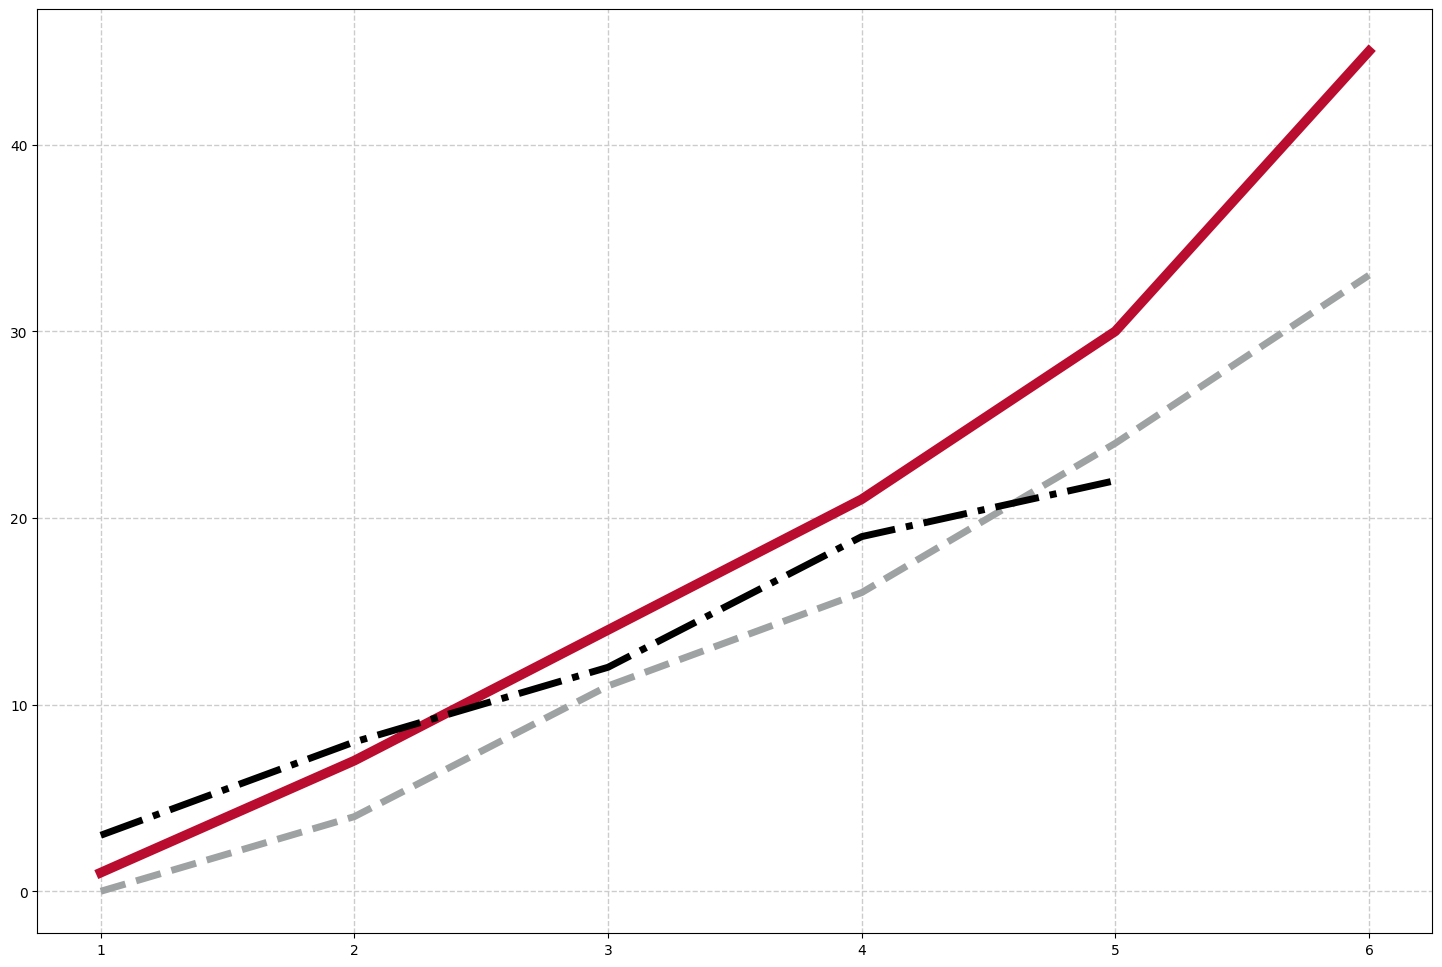

In [51]:
# Create a plot
line_df = pd.pivot_table(kirby_v_line_df_flat[(kirby_v_line_df_flat.coach_name.isin(['Kirby Smart', 'Nick Saban'])) 
                                              & (kirby_v_line_df_flat.coaching_year <= 6)
                                              & (kirby_v_line_df_flat.college_team != 'Toledo')
                                             ], index = 'coaching_year', columns = 'coach_school', values= 'school_tenure_drafts')
px = 1/plt.rcParams['figure.dpi']
pixel_width, pixel_height = (1800, 1200)

title_font = "Oswald" #"NCAA Georgia Bulldog Bold"
axis_font = subtitle_font = "Oswald"
fontweight="bold"

fig, ax = plt.subplots(figsize=(pixel_width*px, pixel_height*px))

# Add grid
ax.grid(color='#cccccc', linestyle='--', zorder=0, linewidth=1) #, axis="x")
lines = []
for i, coach_name in enumerate(line_df.columns):
    if 'Smart' in coach_name:
        line_dict_key = 'Kirby Smart'
    else:
        line_dict_key = coach_name
    line, = ax.plot(line_df[coach_name], 
            color=saba_starts_color_dict[line_dict_key]['color'], 
            linestyle=saba_starts_color_dict[line_dict_key]['linestyle'],
            linewidth=get_line_attr(line_df, line_dict_key, saba_starts_color_dict, attr='linewidth', default=5),
            label=coach_name,
            zorder=10)
    lines.append(line)
    
ax.set_xlabel("First Years as Head Coach at Each School", fontdict={'fontname': axis_font, 'fontsize': pixel_width/40, 'fontweight':'medium'})
ax.set_ylabel('# Drafted Players', fontdict={'fontname': axis_font, 'fontsize': pixel_width/40, 'fontweight':'medium'})

ax.set_title('Cumulative # Players\nDrafted per Head Coach', fontdict={'fontname': title_font, 
                                                                                    'fontsize': pixel_width/32, 
                                                                                    'fontweight':"medium"})
plt.draw()
# # Set Y-axis font
for item in ax.get_yticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    text = item.get_text()
    if text == "Kirby Smart":
        item.set_fontweight("medium")
    else:
        item.set_fontweight("light")

# Set X-axis font
for item in ax.get_xticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    item.set_fontweight("light")
ax.tick_params(axis='y', which='major', pad=5)
ax.legend(loc='upper left', 
          fontsize=pixel_width/80, 
          handles=lines, 
          #labels=[x + ': ' + line_df_flat.loc[(line_df_flat.coaching_year == 6) & (line_df_flat.coach_name == x), 'career_span'].values[0] for x in line_df.columns.tolist()]
         ) 
#, ncol=2, bbox_to_anchor=(.5, 1.1))
# plt.xlim([25, 50])
# # Adjust padding
plt.text(.995, .005, "Ben Leathers\n@LeathersHead\nraw data from cfbd", transform=ax.transAxes ,
             ha='right', va='bottom'
         ,fontdict={'fontname': axis_font, 
                    'fontsize': pixel_width/70, 
                    'fontweight':"light",
                    'color':"black"
                   })

for coach_name in line_df.columns:
    val_1 = int(line_df.loc[1, coach_name])
    if 'LSU' in coach_name or 'Michigan' in coach_name:
        x_6 = 5
        val_6 = line_df.loc[5, coach_name]
    else:
        x_6 = 6
        val_6 = line_df.loc[6, coach_name]
    if val_6 > 0:
        val_6 = int(val_6)
    annotation_font_size = pixel_width/60
    annotation_x_offset = pixel_width/100
    if 'Smart' in coach_name:
        line_dict_key = 'Kirby Smart'
    else:
        line_dict_key = coach_name

    if 'LSU' in coach_name:
        ax.annotate(
            val_1,
            xy=(1, val_1 + 1), xycoords='data',
            xytext=(-1 * annotation_x_offset, 15 if coach_name == 'Larry Coker' else 0), textcoords='offset pixels',
            fontsize= annotation_font_size,
            fontfamily=axis_font,
            color=saba_starts_color_dict[line_dict_key]['color'],
            ha = 'right',
            va = 'center'
        )
    elif 'Kirby Smart' in coach_name:
        ax.annotate(
            val_1,
            xy=(1, val_1), xycoords='data',
            xytext=(-1 * annotation_x_offset, 15 if coach_name == 'Larry Coker' else 0), textcoords='offset pixels',
            fontsize= annotation_font_size,
            fontfamily=axis_font,
            color=saba_starts_color_dict[line_dict_key]['color'],
            ha = 'right',
            va = 'center'
        )
    elif 'Michigan' in coach_name:
        ax.annotate(
            val_1,
            xy=(1.1, -3), xycoords='data',
            xytext=(-1 * annotation_x_offset, 15 if coach_name == 'Larry Coker' else 0), textcoords='offset pixels',
            fontsize= annotation_font_size,
            fontfamily=axis_font,
            color=saba_starts_color_dict[line_dict_key]['color'],
            ha = 'right',
            va = 'center'
        )
    else:
        ax.annotate(
            val_1,
            xy=(1, -2), xycoords='data',
            xytext=(-1 * annotation_x_offset * .7, 15 if coach_name == 'Larry Coker' else 0), textcoords='offset pixels',
            fontsize= annotation_font_size,
            fontfamily=axis_font,
            color=saba_starts_color_dict[line_dict_key]['color'],
            ha = 'right',
            va = 'center'
        )
    ax.annotate(
        val_6,
        xy=(x_6, val_6), xycoords='data',
        xytext=(annotation_x_offset, 0), textcoords='offset pixels',
        fontsize= annotation_font_size,
        fontfamily=axis_font,
        color=saba_starts_color_dict[line_dict_key]['color'],
        ha = 'left',
        va = 'center',
        # arrowprops=dict(arrowstyle="->")
    )
# plt.xlim([0, 6])
plt.margins(x=.07, y=.2)
plt.tight_layout()
# # plt.savefig('num_draft_picks_through_first_6_years_as_head_coach.png', 
# # fig.savefig('top_num_draft_picks_through_first_6_years_as_head_coach.svg', format='svg', dpi=1200)
fig.savefig('smart_v_saban_draft.png', facecolor='white', transparent=False)

<div style="font-family:Merriweather Sans; margin-bottom: 40px">In fairness to Saban he didn't start his heach coaching careers at a blue blood football school, so lets compare the results from the start of each school's tenure.</div>

![](smart_v_saban_draft.png)

<div style="font-family:Merriweather Sans; margin-bottom: 40px"></div>

In [ ]:
q = """WITH coaches AS (
    SELECT
        first_name || " " || last_name AS coach_name, 
        school AS college_team,
        year,
        ROW_NUMBER() OVER (PARTITION BY first_name, last_name ORDER BY year ASC) AS coaching_year
    FROM get_coaches
    WHERE first_name = "Nick" AND last_name = "Saban"
    )
, coaches_careers AS (WITH RECURSIVE
    coaches_recurse AS (
        SELECT
            coach_name,
            college_team,
            year,
            coaching_year, 
            college_team || ': ' || year AS career
        FROM coaches
        WHERE coaching_year = 1
        UNION ALL
        SELECT
            a.coach_name,
            a.college_team,
            a.year,
            a.coaching_year,
            
            CASE 
                WHEN a.college_team = b.college_team AND a.year = b.year + 1
                THEN 
                    CASE 
                        WHEN b.career LIKE '%,%' 
                        THEN CASE 
                                WHEN substr(b.career, LENGTH(b.career) - INSTR(strrev(b.career), ',') + 1) LIKE '%-%' 
                                THEN SUBSTR(b.career, 1, LENGTH(b.career) - 4) || CAST(a.year AS TEXT)
                                ELSE b.career || '-' || CAST(a.year AS TEXT)
                            END
                        ELSE CASE
                                WHEN b.career LIKE '%-%' 
                                THEN SUBSTR(b.career, 1, LENGTH(b.career) - 4) || CAST(a.year AS TEXT)
                                ELSE b.career || '-' || CAST(a.year AS TEXT)
                            END
                    END
                ELSE b.career || ', ' || a.college_team || ': ' || CAST(a.year AS TEXT)
            END AS career
        FROM coaches AS a
        JOIN coaches_recurse AS b
        ON a.coach_name = b.coach_name
        AND a.coaching_year = b.coaching_year + 1
        )
        SELECT * FROM coaches_recurse
    )
    
, draft_picks AS (
    SELECT
        year - 1 AS year,
        college_team,
        COUNT(1) AS num_drafted
    FROM get_draft_picks
    WHERE college_team IS NOT NULL
    AND year IS NOT NULL
    GROUP BY 1, 2
    )
    
, coach_draft_years AS (
    SELECT
        coach_name,
        college_team,
        year,
        coaching_year,
        career,
        COALESCE(num_drafted, 0) AS num_drafted
    FROM coaches_careers
    LEFT JOIN draft_picks USING (year, college_team)
)

, best_six AS (
    SELECT
        coach_name,
        college_team,
        year,
        coaching_year,
        career,
        num_drafted, 
        SUM(num_drafted) OVER (PARTITION BY coach_name ORDER BY coaching_year ASC RANGE BETWEEN 5 PRECEDING AND CURRENT ROW) AS six_year_drafts
    FROM coach_draft_years
)

SELECT
        RANK() OVER (PARTITION BY coaching_year ORDER BY six_year_drafts DESC) AS coaching_school_year_rank,
        coach_name,
        college_team,
        year,
        career AS career_span,
        num_drafted, 
        six_year_drafts,
        coaching_year
FROM best_six
WHERE year != 2022
ORDER BY year ASC

"""
saban_best_6 = pd.read_sql_query(q, conn)
saban_best_6#.head(10)

In [ ]:
coaches_for_school_tenures = ['Kirby Smart', 'Nick Saban', 'Steve Spurrier', 'Urban Meyer']
kirby_v_line_df_flat = coaches_school_careers[coaches_school_careers.coach_name.isin(coaches_for_school_tenures)].sort_values(by = ['coach_name', 'year'], ascending=True).reset_index()
# line_df.sort_values(by=['coach_name','year'])

In [ ]:
kirby_v_line_df_flat.sort_values(by=['coach_name','year'])

In [ ]:
# https://youtu.be/mfhmWPG50Bk?t=85

In [ ]:
kirby_v_total_tenure_per_school = kirby_v_line_df_flat.groupby(['coach_name', 'college_team']).max().reset_index()[['coach_name', 'college_team', 'career_span']]

In [ ]:
kirby_v_total_tenure_per_school['coach_school'] = kirby_v_total_tenure_per_school['coach_name'] + ' - ' + kirby_v_total_tenure_per_school['career_span']

In [ ]:
kirby_v_total_tenure_per_school

In [ ]:
#kirby_v_total_tenure_per_school[((kirby_v_total_tenure_per_school.college_team.isin(['LSU', 'Alabama', ,'Florida', 'Michigan State', 'South Carolina', 'Ohio State'])))]['coach_school']

In [ ]:
coaches_line_dict = add_lines_to_dict(coaches_line_dict, 
                                      kirby_v_total_tenure_per_school[kirby_v_total_tenure_per_school.coach_name != 'Kirby Smart'].coach_school.tolist())

In [ ]:
coaches_line_dict

In [ ]:
def get_coach_school(row):
    return kirby_v_total_tenure_per_school.loc[(kirby_v_total_tenure_per_school.coach_name == row.coach_name) & 
                                        (kirby_v_total_tenure_per_school.college_team == row.college_team),
                                       'coach_school'].values[0]

In [ ]:
kirby_v_line_df_flat['coach_school'] = kirby_v_line_df_flat.apply(get_coach_school, axis=1)

In [ ]:
kirby_v_line_df_flat.columns

In [ ]:
q = """WITH coaches AS (

    SELECT
        first_name || " " || last_name AS coach_name, 
        school AS college_team,
        year,
        ROW_NUMBER() OVER (PARTITION BY first_name, last_name ORDER BY year ASC) AS coaching_year
    FROM get_coaches
    )
    
, draft_picks AS (
    SELECT
        year - 1 AS year,
        college_team,
        COUNT(1) AS num_drafted
    FROM get_draft_picks
    WHERE college_team IS NOT NULL
    AND year IS NOT NULL
    GROUP BY 1, 2
    )
    
, coach_draft_years AS (
    SELECT
        coach_name,
        college_team,
        year,
        coaching_year,
        COALESCE(num_drafted, 0) AS num_drafted
    FROM coaches
    LEFT JOIN draft_picks USING (year, college_team)
)

, cumulative_drafts AS (
    SELECT
        a.coach_name,
        a.year AS year_end,
        a.coaching_year AS coaching_year_end,
        b.num_drafted, 
        b.year,
        b.college_team,
        b.coaching_year,
        SUM(b.num_drafted) OVER (PARTITION BY a.coach_name, a.year ORDER BY b.coaching_year ASC) AS six_year_span_drafts,
        ROW_NUMBER() OVER (PARTITION BY a.coach_name, a.year ORDER BY b.coaching_year ASC) AS span_year_number
    FROM coach_draft_years AS a
    JOIN coach_draft_years AS b USING (coach_name)
    WHERE b.coaching_year BETWEEN a.coaching_year - 5 AND a.coaching_year 
)

, coaches_careers AS (WITH RECURSIVE
    coaches_recurse AS (
        SELECT
            coach_name,
            college_team,
            year,
            year_end,
            coaching_year,
            num_drafted, 
            span_year_number,
            six_year_span_drafts,
            college_team || ': ' || year AS career
        FROM cumulative_drafts
        WHERE span_year_number = 1
        UNION ALL
        SELECT
            a.coach_name,
            a.college_team,
            a.year,
            a.year_end,
            a.coaching_year,
            a.num_drafted, 
            a.span_year_number,
            a.six_year_span_drafts,
            CASE 
                WHEN a.college_team = b.college_team AND a.year = b.year + 1
                THEN 
                    CASE 
                        WHEN b.career LIKE '%,%' 
                        THEN CASE 
                                WHEN substr(b.career, LENGTH(b.career) - INSTR(strrev(b.career), ',') + 1) LIKE '%-%' 
                                THEN SUBSTR(b.career, 1, LENGTH(b.career) - 4) || CAST(a.year AS TEXT)
                                ELSE b.career || '-' || CAST(a.year AS TEXT)
                            END
                        ELSE CASE
                                WHEN b.career LIKE '%-%' 
                                THEN SUBSTR(b.career, 1, LENGTH(b.career) - 4) || CAST(a.year AS TEXT)
                                ELSE b.career || '-' || CAST(a.year AS TEXT)
                            END
                    END
                ELSE b.career || ', ' || a.college_team || ': ' || CAST(a.year AS TEXT)
            END AS career
        FROM cumulative_drafts AS a
        JOIN coaches_recurse AS b
            ON a.coach_name = b.coach_name
            AND a.year_end = b.year_end
            AND a.coaching_year = b.coaching_year + 1
        )
        SELECT * FROM coaches_recurse
    )

SELECT
    RANK() OVER (ORDER BY six_year_span_drafts DESC) AS coaching_school_year_rank,
    coach_name,
    college_team,
    year,
    career AS career_span,
    num_drafted, 
    six_year_span_drafts,
    coaching_year
FROM coaches_careers
WHERE year != 2022
AND span_year_number = 6
ORDER BY six_year_span_drafts DESC, coaching_year DESC
"""
coaches_school_careers = pd.read_sql_query(q, conn)
coaches_school_careers.head(14)

In [ ]:
bar_df = coaches_school_careers.head(14).iloc[::-1].reset_index()#.sort_values(by = 'six_year_span_drafts', ascending=True).reset_index()

def rreplace(s, old, new, occurrence):
    li = s.rsplit(old, occurrence)
    return new.join(li)

# Create a plot
px = 1/plt.rcParams['figure.dpi']
pixel_width, pixel_height = (1800, 1200)

title_font = "Oswald" #"NCAA Georgia Bulldog Bold"
axis_font = subtitle_font = "Oswald"
fontweight="bold"

fig, ax = plt.subplots(figsize=(pixel_width*px, pixel_height*px))

# Add grid
ax.grid(color='#dddddd', linestyle='--', zorder=0, axis="x")
bars = ax.barh(bar_df['career_span'], bar_df['six_year_span_drafts'], zorder=10)

fig.canvas.draw()
r = fig.canvas.get_renderer()

# Color and Label Bars
for ix, bar in enumerate(ax.patches):
    bar.set_color('black')
    if bar_df.loc[ix, 'coach_name'] == 'Kirby Smart':
        bar.set_color('#BA0C2F')
    if bar_df.loc[ix, 'coach_name'] == 'Nick Saban':
        bar.set_color(uga_colors_dict['grey'])
    plt.text(bar.get_width() + .5, bar.get_y()+0.5*bar.get_height(),
                 f"{int(bar.get_width())}",
                 ha='left', va='center'
             ,fontdict={'fontname': axis_font, 
                        'fontsize': pixel_width/55, 
                        'fontweight':"medium"}
            )
    
    annotation_margin = .35
    annotation = plt.text(annotation_margin, bar.get_y()+0.5*bar.get_height(),
                 f"{bar_df.loc[ix, 'career_span']}",
                 ha='left', va='center'
             ,fontdict={'fontname': axis_font, 
                        'fontsize': pixel_width/72, 
                        'fontweight':"light",
                        'color':"white"
                       }
                          , zorder=11
            )
    tbb = annotation.get_window_extent(renderer=r)
    text_width = tbb.width
    text_height = tbb.height
    bbb = bar.get_window_extent(renderer=r)
    bar_width = bbb.width
    bar_height = bbb.height
    if text_width > bar_width - 10:
        last_text = annotation.get_text()
        if ',' not in last_text:
            break
        next_text = rreplace(last_text, ', ', '\n', 1)
        annotation.set_text(next_text)
        old_fontsize = annotation.get_fontsize()
        annotation.set_fontsize(old_fontsize * .75)

# # Color bars
        
# {bar_df.loc[ix, 'coaching_year_rank']}
    
# ax.set_xlabel("Total Draft Picks", fontdict={'fontname': axis_font, 'fontsize': pixel_width/40, 'fontweight':'medium'})
ax.set_ylabel('', fontdict={'fontname': axis_font, 'fontsize': pixel_height/20, 'fontweight':'medium'})

ax.set_title('Best Six Year Spans\nof Draft Production', fontdict={'fontname': title_font, 
                                                                                    'fontsize': pixel_width/30, 
                                                                                    'fontweight':"medium"})
plt.draw()
# Set Y-axis font
for item in ax.get_yticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/55)
    text = item.get_text()
    if text == "Kirby Smart":
        item.set_fontweight("medium")
    else:
        item.set_fontweight("light")

labels = [f"{bar_df.loc[ix, 'coach_name']}: #{bar_df.loc[ix, 'coaching_school_year_rank']}" for ix, item in enumerate(ax.get_yticklabels())]
ax.set_yticklabels(labels)

# Set X-axis font
for item in ax.get_xticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    item.set_fontweight("light")
ax.tick_params(axis='y', which='major', pad=5)
# plt.xlim([25, 50])
# Adjust padding
plt.text(.995, .005, "Ben Leathers\n@LeathersHead\nRaw data from cfbd", transform=ax.transAxes ,
             ha='right', va='bottom'
         ,fontdict={'fontname': axis_font, 
                    'fontsize': pixel_width/80, 
                    'fontweight':"light",
                    'color':"black"
                   })
plt.margins(x=.07, y=.01)
plt.tight_layout()
# plt.savefig('num_draft_picks_through_first_6_years_as_head_coach.png', 
# fig.savefig('top_num_draft_picks_through_first_6_years_as_head_coach.svg', format='svg', dpi=1200)vv
fig.savefig('best_6_year_span.png', facecolor='white', transparent=False)

<div style="font-family:Merriweather Sans; margin-bottom: 40px"></div>


<div style="font-family:Merriweather Sans; margin-bottom: 40px">Kirby's start at UGA is out pacing any of Saban's starts. However, we don't call him the greatest in history for no reason, so let's see how things compare when we look at ANY 6 year span...</div>

![](best_6_year_span.png)

<div style="font-family:Merriweather Sans; margin-bottom: 40px">And there it is. Saban has spent the last 11 years churning out NFL talent at an unprecedented level, and thus he currently occupies the top 6 spots in that ranking.</div>


<div style="font-family:Merriweather Sans; margin-bottom: 40px">So while Kirby has certainly gotten the flywheel of player development up to speed quicker than anyone else, the question is, can he sustain that? According to <a href="https://youtu.be/mfhmWPG50Bk?t=85">his post G-Day press conference</a> last weekend, UGA is "built to sustain... That's my motto.", and by all accounts that looks to be the case.</div>


<div style="font-family:Merriweather Sans; margin-bottom: 40px">Let's take a look at Saban's entire career to get an idea of what it looks like to sustain, and where the bar has been set.</div>


In [ ]:
kirby_v_line_df_flat[(kirby_v_line_df_flat.coach_name.isin(['Kirby Smart', 'Nick Saban']))].head(50)

In [ ]:
coaches_school_careers[(coaches_school_careers.coach_name.isin(['Kirby Smart', 'Nick Saban']))].head(50)

In [ ]:
line_df = pd.pivot_table(coaches_school_careers[(coaches_school_careers.coach_name.isin(['Kirby Smart', 'Nick Saban']))]
                         , index = 'career_coaching_year', columns = 'school_span_title', values= 'total_draft_picks')

In [ ]:
last_color_dict = {'Kirby Smart': {'color': '#BA0C2F', 'linestyle': 'solid', 'linewidth': 7},
                   'Kirby Smart - Georgia: 2016-2021':{'color': '#BA0C2F', 'linestyle': 'solid', 'linewidth': 7},
 'Nick Saban - Toledo: 1990': {'color': '#B4BD00', 'linestyle': 'dashdot'},
 'Nick Saban - Alabama: 2007-2021': {'color': '#9EA2A2', 'linestyle': 'dashed'},
 'Nick Saban - LSU: 2000-2004': {'color': '#000000', 'linestyle': 'dashdot'},
 'Nick Saban - Michigan State: 1995-1999': {'color': '#00A3AD', 'linestyle': 'dashdot'}
                  }

In [ ]:
# Create a plot

px = 1/plt.rcParams['figure.dpi']
pixel_width, pixel_height = (1800, 1200)

title_font = "Oswald" #"NCAA Georgia Bulldog Bold"
axis_font = subtitle_font = "Oswald"
fontweight="bold"

fig, ax = plt.subplots(figsize=(pixel_width*px, pixel_height*px))

# Add grid
ax.grid(color='#cccccc', linestyle='--', zorder=0, linewidth=1) #, axis="x")
lines = []
for i, coach_name in enumerate(line_df.columns):
    if 'Smart' in coach_name:
        line_dict_key = 'Kirby Smart'
    else:
        line_dict_key = coach_name
    line, = ax.plot(line_df[coach_name], 
            color=last_color_dict[line_dict_key]['color'], 
            linestyle=last_color_dict[line_dict_key]['linestyle'],
            linewidth=get_line_attr(line_df, line_dict_key, last_color_dict, attr='linewidth', default=5),
            label=coach_name,
            zorder=10)
    lines.append(line)
    
ax.set_xlabel("Years as Head Coach", fontdict={'fontname': axis_font, 'fontsize': pixel_width/40, 'fontweight':'medium'})
ax.set_ylabel('# Drafted Players', fontdict={'fontname': axis_font, 'fontsize': pixel_width/40, 'fontweight':'medium'})

ax.set_title('Cumulative # Players\nDrafted per Head Coach', fontdict={'fontname': title_font, 
                                                                                    'fontsize': pixel_width/32, 
                                                                                    'fontweight':"medium"})
plt.draw()
# # Set Y-axis font
for item in ax.get_yticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    text = item.get_text()
    if text == "Kirby Smart":
        item.set_fontweight("medium")
    else:
        item.set_fontweight("light")

# Set X-axis font
for item in ax.get_xticklabels():
    item.set_fontname(axis_font)
    item.set_fontsize(pixel_width/40)
    item.set_fontweight("light")
ax.tick_params(axis='y', which='major', pad=5)
ax.legend(loc='upper left', 
          fontsize=pixel_width/80, 
          handles=lines, 
          #labels=[x + ': ' + line_df_flat.loc[(line_df_flat.coaching_year == 6) & (line_df_flat.coach_name == x), 'career_span'].values[0] for x in line_df.columns.tolist()]
         ) 
#, ncol=2, bbox_to_anchor=(.5, 1.1))
# plt.xlim([25, 50])
# # Adjust padding
plt.text(.995, .005, "Ben Leathers\n@LeathersHead\nraw data from cfbd", transform=ax.transAxes ,
             ha='right', va='bottom'
         ,fontdict={'fontname': axis_font, 
                    'fontsize': pixel_width/70, 
                    'fontweight':"light",
                    'color':"black"
                   })

for coach_name in line_df.columns:
    x_max = line_df[coach_name].idxmax()
    y_max = int(line_df.loc[x_max, coach_name])
    annotation_font_size = pixel_width/60
    annotation_x_offset = pixel_width/200
    line_dict_key = coach_name


    va = 'top' if 'Toledo' in coach_name else 'center'
    
    ax.annotate(
        y_max,
        xy=(x_max, y_max), xycoords='data',
        xytext=(annotation_x_offset, 0), textcoords='offset pixels',
        fontsize= annotation_font_size,
        fontfamily=axis_font,
        color=last_color_dict[line_dict_key]['color'],
        ha = 'left',
        va = va,
        # arrowprops=dict(arrowstyle="->")
    )

# plt.xlim([0, 6])
plt.margins(x=.07, y=.2)
plt.tight_layout()
# # plt.savefig('num_draft_picks_through_first_6_years_as_head_coach.png', 
# # fig.savefig('top_num_draft_picks_through_first_6_years_as_head_coach.svg', format='svg', dpi=1200)
fig.savefig('smart_v_saban_full_career_draft.png', facecolor='white', transparent=False)

<div style="font-family:Merriweather Sans; margin-bottom: 40px"></div>


![](smart_v_saban_full_career_draft.png)

<div style="font-family:Merriweather Sans; margin-bottom: 40px">Wow. That puts "sustain" into perspective. Saban has over 25 years as a head coach, and he's sustained greatness over that span. Kirby has gotten off to an elite start. Only time will tell if he'll be able to sustain long enough to cement himself as the G.O.A.T. </div>


<br></br>

<h1 style="font-family:Merriweather Sans">Takeaways:</h1>

<h2 style="font-family:Merriweather Sans">Kirby's program develops players.</h2>

<h2 style="font-family:Merriweather Sans">Kirby's Death Star might not have even been fully operational yet... 🤯</h2>

<h2 style="font-family:Merriweather Sans">"All Time" includes the future, and while Saban might be the greatest in history, Kirby is on the path to take over and when it's all said and done...</h2>

<h1 style="font-family:Merriweather Sans">Saban will not be the G.O.A.T., Kirby will.</h1>

<div style="font-family:Merriweather Sans">This analysis was based on an open source dataset, cfbd, and while I'm confident in my work, I am also confident I'm human, so if you find a mistake, please let me know.</div>